In [1]:
import numpy as np
import seaborn  as sns 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge 
from sklearn.linear_model import  Lasso 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV

In [2]:
baseball = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')


In [3]:
baseball.rename(columns = {'W' : 'Wins', 'R' : 'Runs Scored', 'AB' : 'At Bat', 'H' : 'Hits', '2B' : 'Doubles', '3B' : 'Triples', 'HR' : 'Home Runs', 'BB' : 'Base on Balls', 'SO' : 'Strike Outs', 'SB' : 'Stolen Base', 'RA' : 'Runs Average', 'ER' : 'Earned Runs','ERA' : 'Earned Run Average', 'CG' : 'Complete Game', 'SHO' : 'Shut Outs', 'SV' : 'Saves', 'E' : 'Errors'}, inplace=True)


In [37]:
baseball

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Data Analysis

# # on basis of runs

In [7]:

baseball.pivot_table(index='Wins',  values='Earned Runs')

,Earned Runs
Wins,
63,749.0
64,700.0
67,698.0
68,715.0
71,638.0
74,700.5
76,660.0
78,694.0
79,659.0


<Axes: xlabel='Wins'>

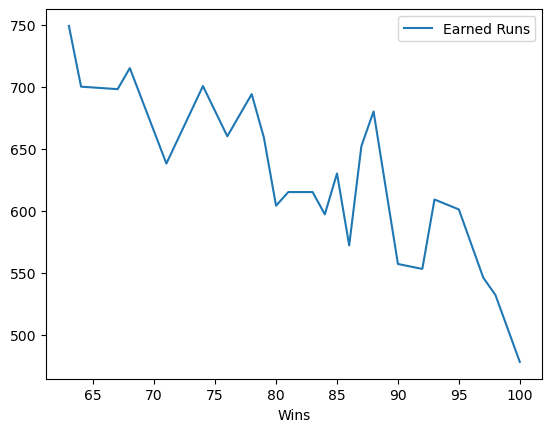

In [8]:
baseball.pivot_table(index='Wins',  values='Earned Runs').plot()

# There is opposite relationship between WIns and Earned Runs
# when earned runs are high and wins are low e.g earned runs are 750 and wins equal to 65


<Axes: xlabel='Wins'>

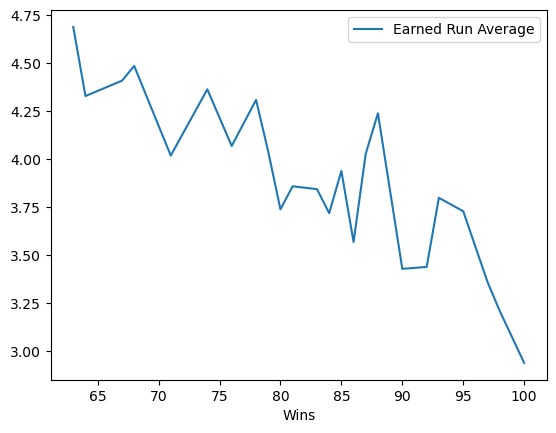

In [9]:
baseball.pivot_table(index='Wins', values='Earned Run Average').plot()

<Axes: xlabel='Wins'>

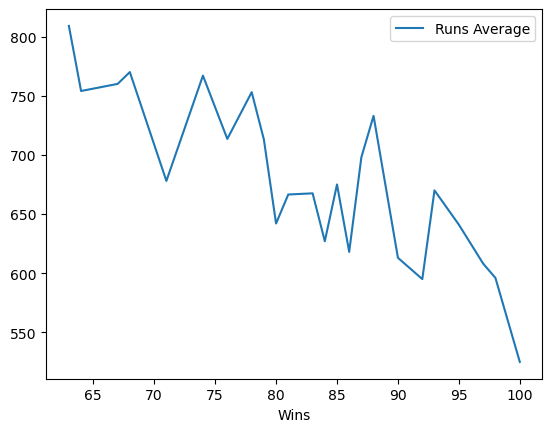

In [10]:
baseball.pivot_table(index='Wins', values='Runs Average').plot()

# there is opposite relationship between wins and runs average as well as earned run average, when average runs are high and Wins are very low 
# when wins are high runs earned are low

# # on basis of Strike Outs, Stolen Base

<Axes: xlabel='Wins'>

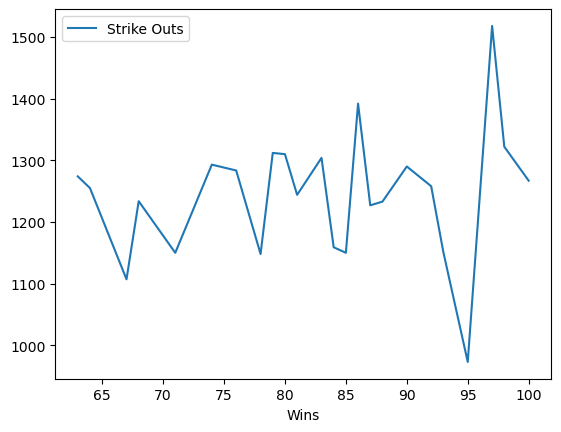

In [13]:
baseball.pivot_table(index='Wins', values='Strike Outs').plot(kind='line')

# Strike Outs is changing, irrespective of change in wins 
# when wins are 95, striks out are lower than 1000
# when wins equal to 98, then Strike Outs are equal to or around 1500

<Axes: xlabel='Wins'>

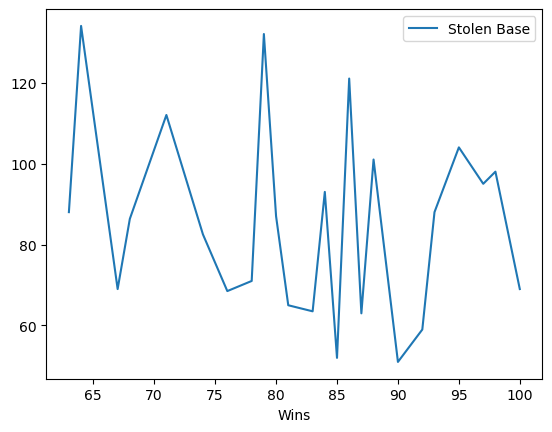

In [14]:
baseball.pivot_table(index='Wins', values='Stolen Base').plot(kind='line')

<Axes: xlabel='Wins'>

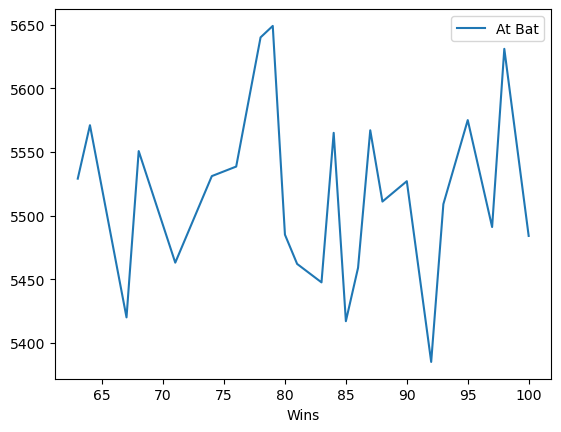

In [15]:
baseball.pivot_table(index='Wins', values='At Bat').plot()

# At Bat is changing irrespective of change in WIns

In [ ]:
# 

# comparison of input and output

<Axes: xlabel='Runs Scored', ylabel='Hits'>

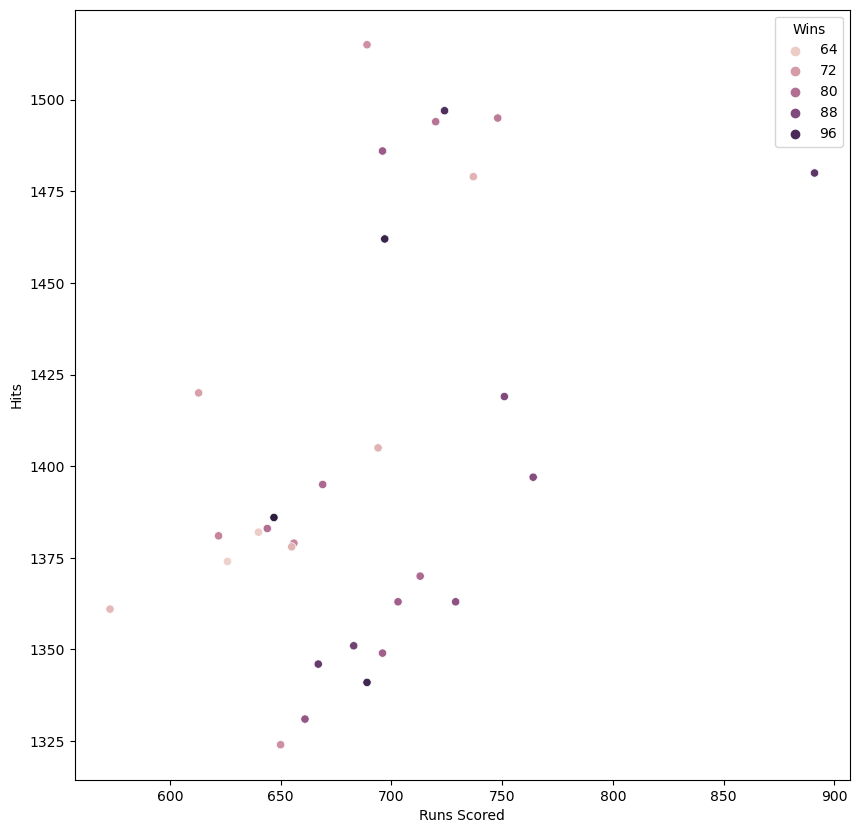

In [5]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = baseball, x = 'Runs Scored', y ='Hits', hue = 'Wins')

<Axes: xlabel='Hits', ylabel='Home Runs'>

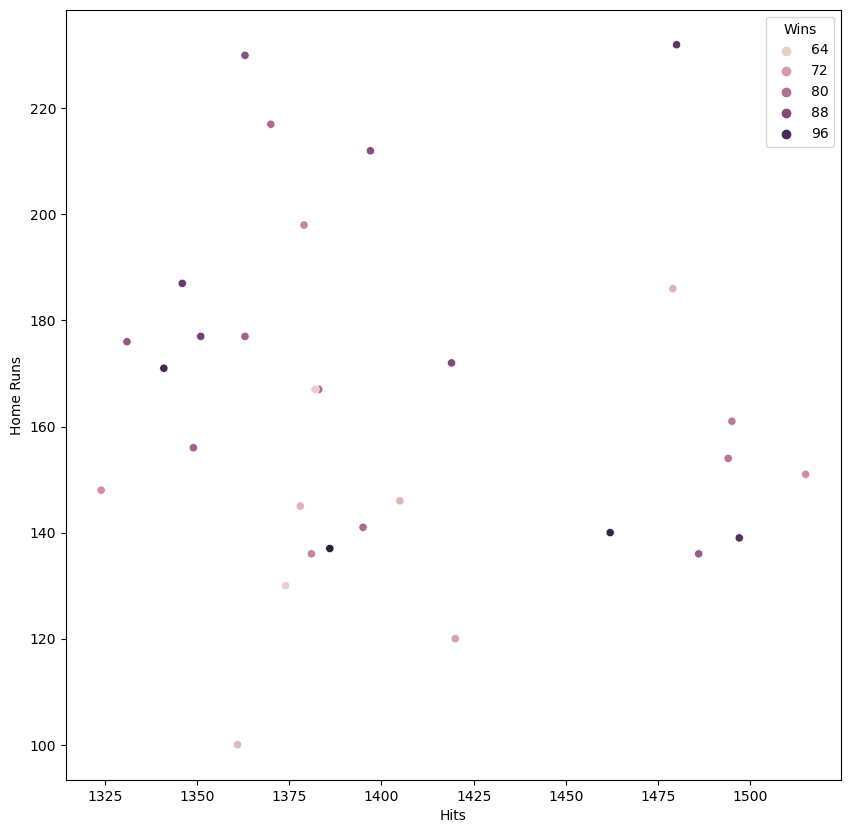

In [6]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = baseball, x = 'Hits', y ='Home Runs', hue = 'Wins')

In [7]:
# hits between 1325 and 1415, there are high number of hits 

# hits between 1410 and 1500, home runs are between 130 to 160
# there are less no of home runs 1415 and 1460

<Axes: xlabel='Hits', ylabel='Home Runs'>

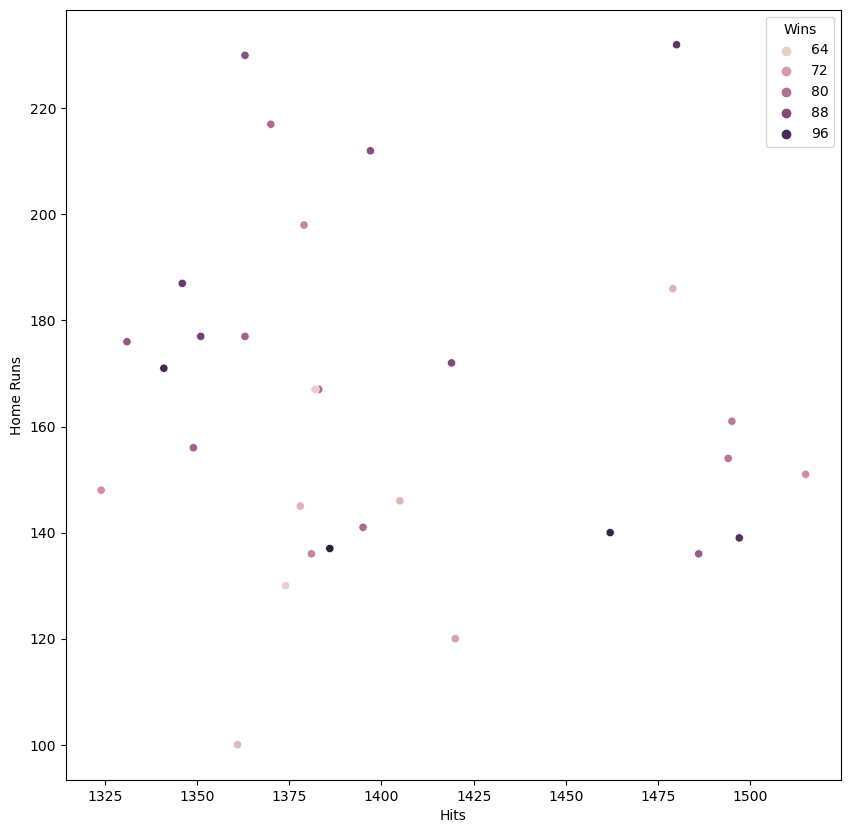

In [8]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = baseball, x = 'Hits', y ='Home Runs', hue = 'Wins')

In [9]:
# there are less home runs higher than 190, where Hits between 1325 and 1400
# and but low or less home runs between 1325 and 1400 hits

# there are rare chance of home runs when hits between 1325 and 1400 but better than hits between 1450 and 1500

<Axes: xlabel='Stolen Base', ylabel='Runs Scored'>

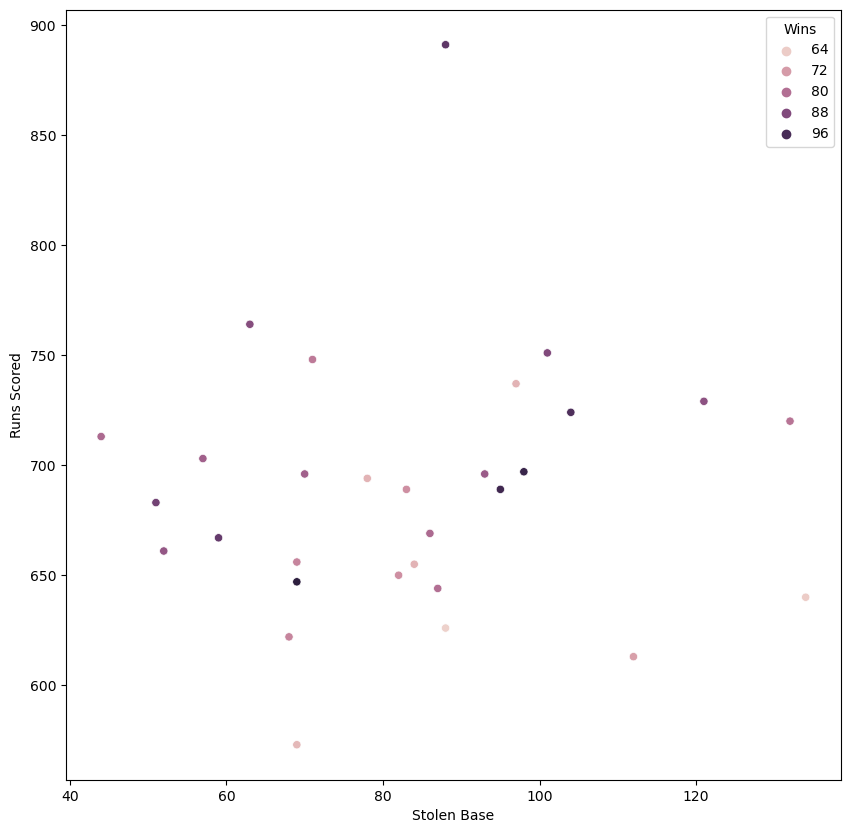

In [10]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = baseball, x = 'Stolen Base', y ='Runs Scored', hue = 'Wins')

<Axes: xlabel='Complete Game', ylabel='Runs Scored'>

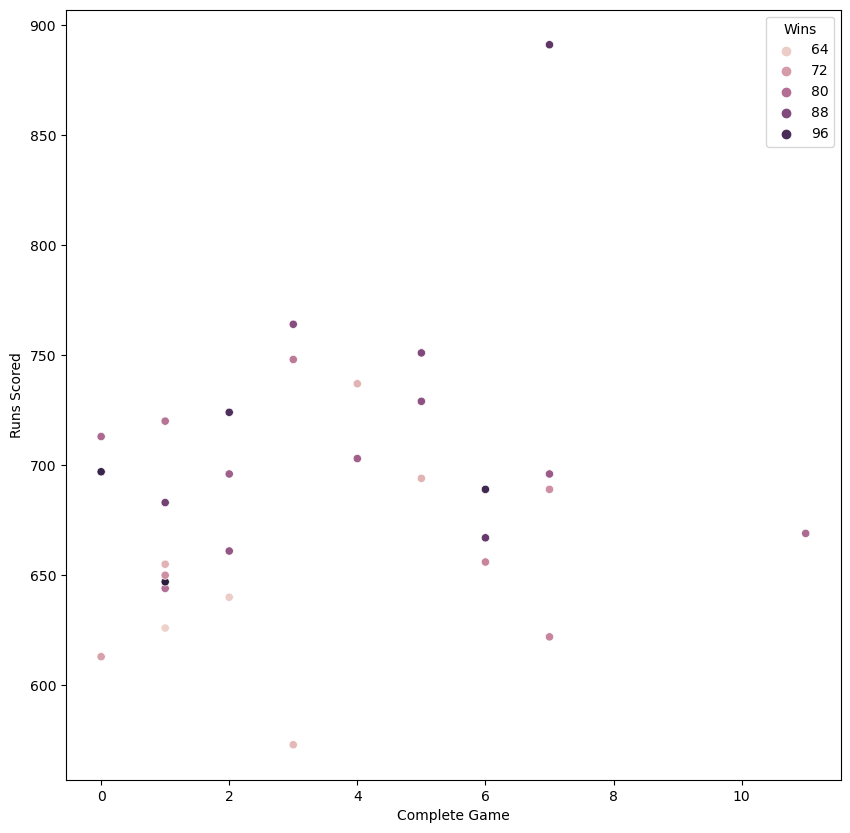

In [11]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = baseball, x = 'Complete Game', y ='Runs Scored', hue = 'Wins')

<Axes: xlabel='Runs Average', ylabel='Earned Runs'>

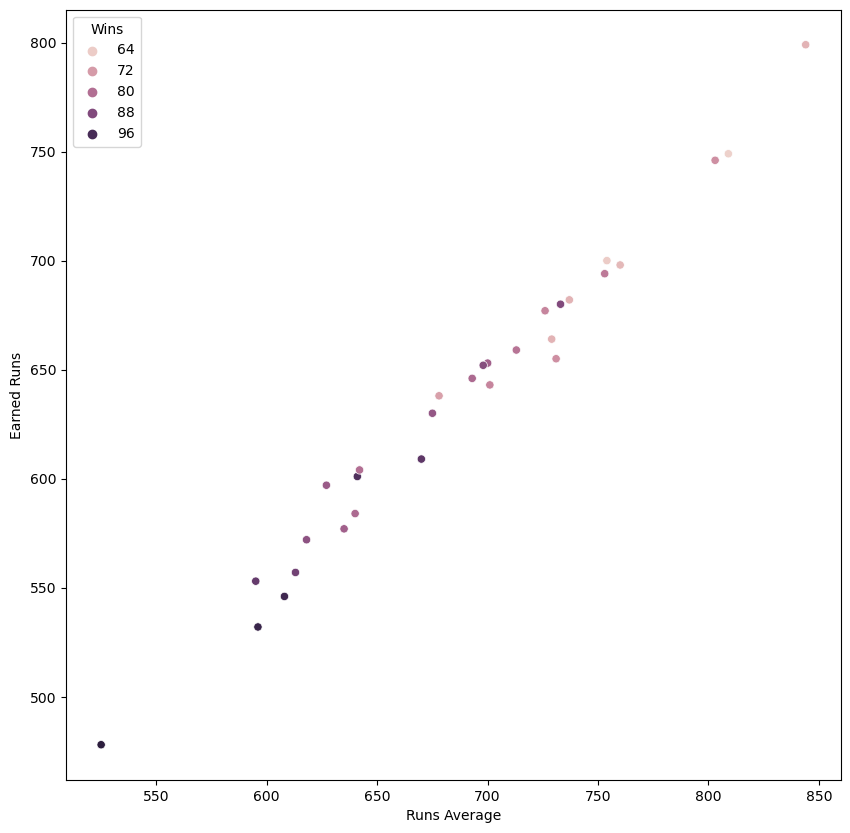

In [12]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = baseball, x = 'Runs Average', y ='Earned Runs', hue = 'Wins')

# Relational Plot between Input and Output

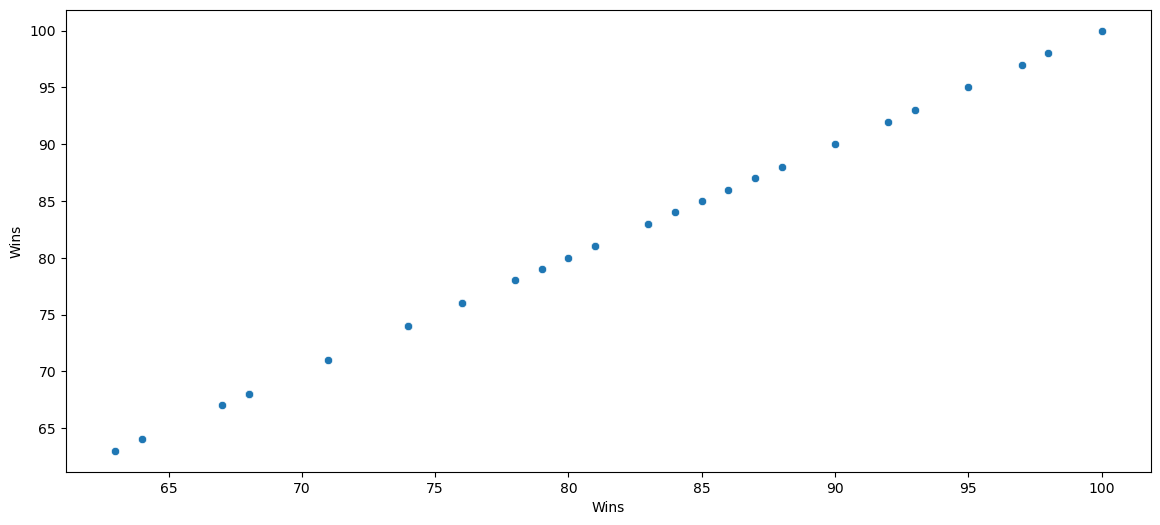

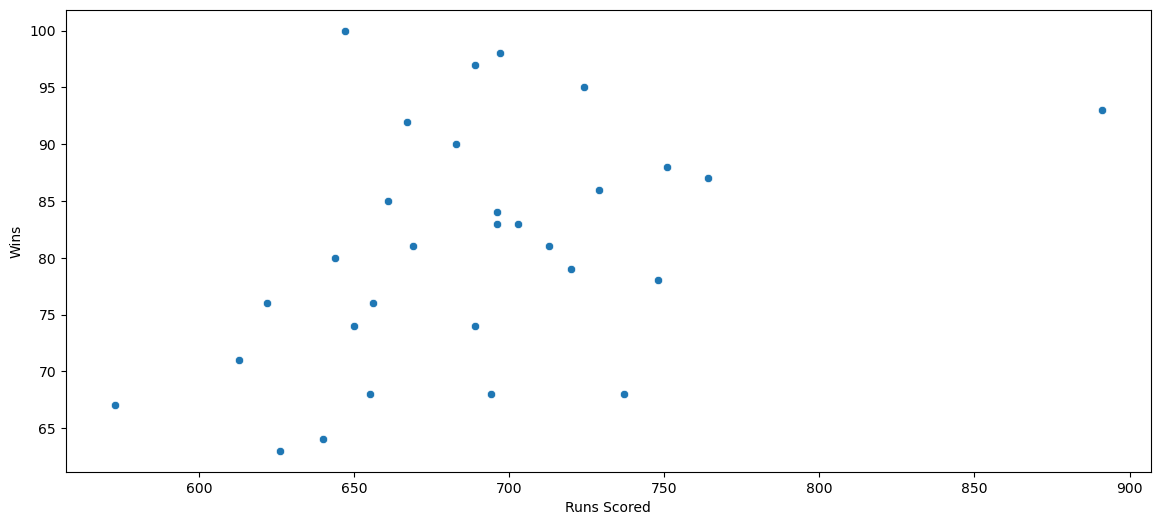

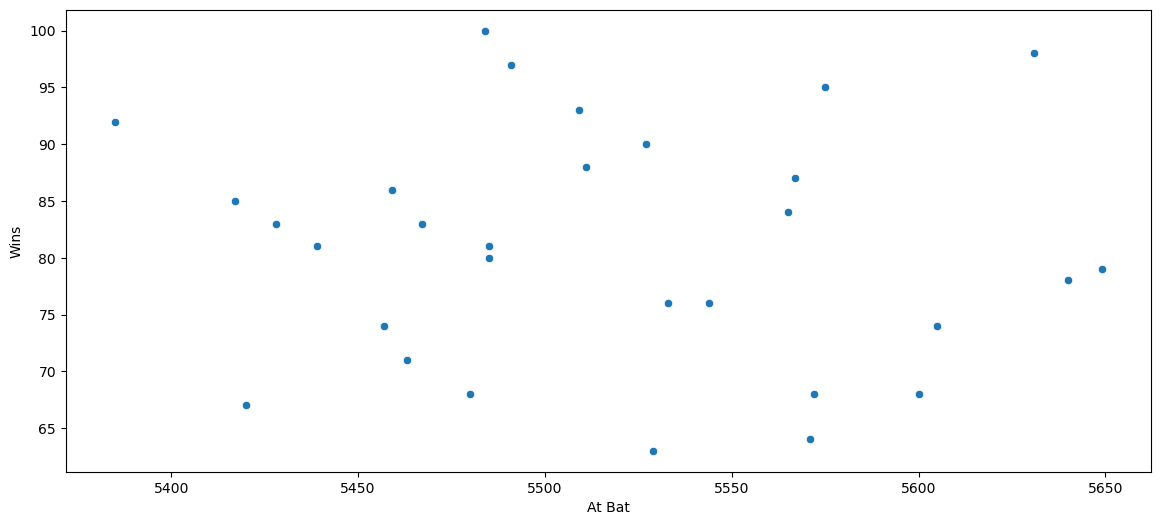

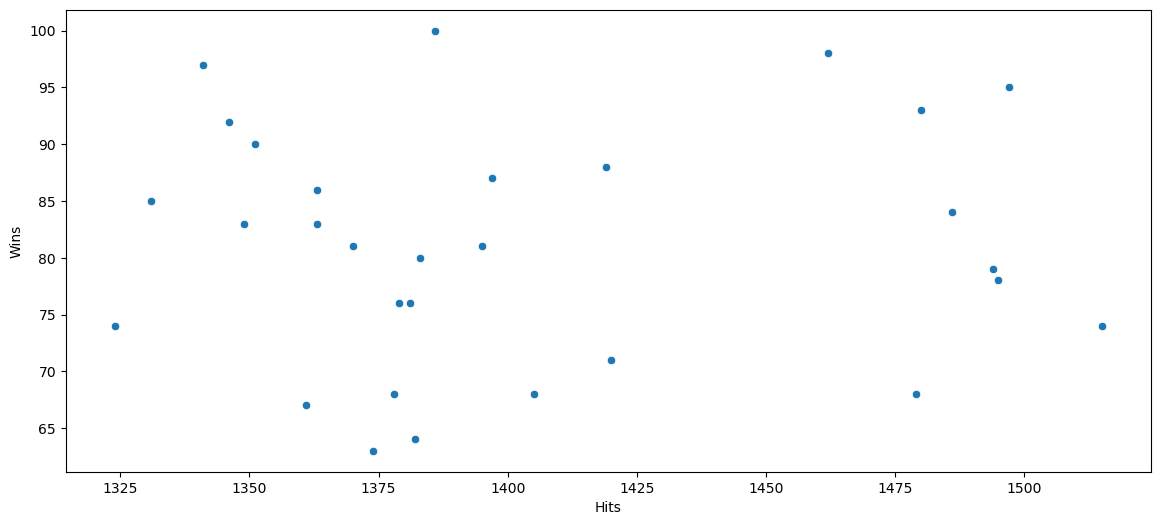

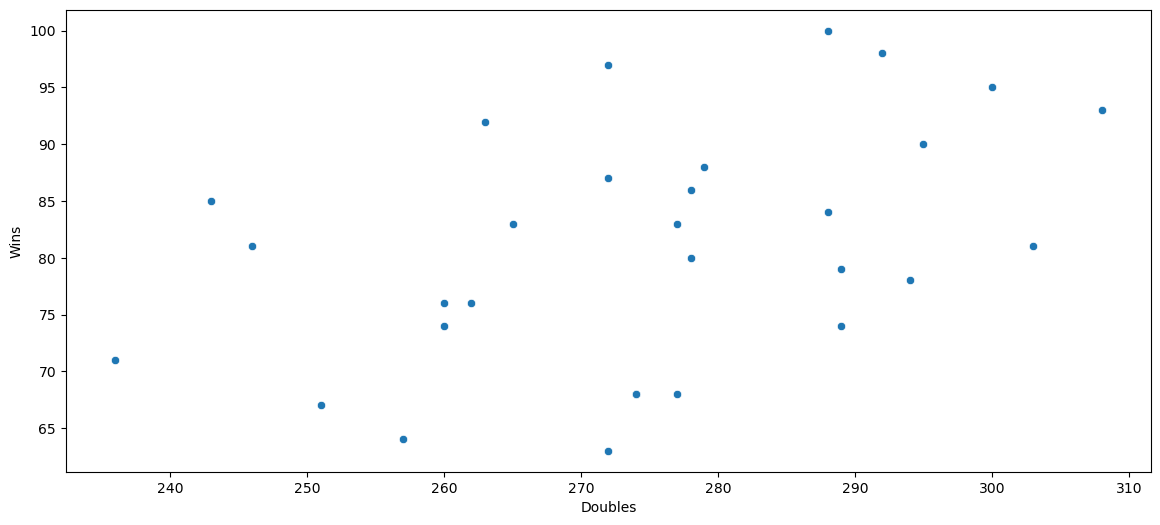

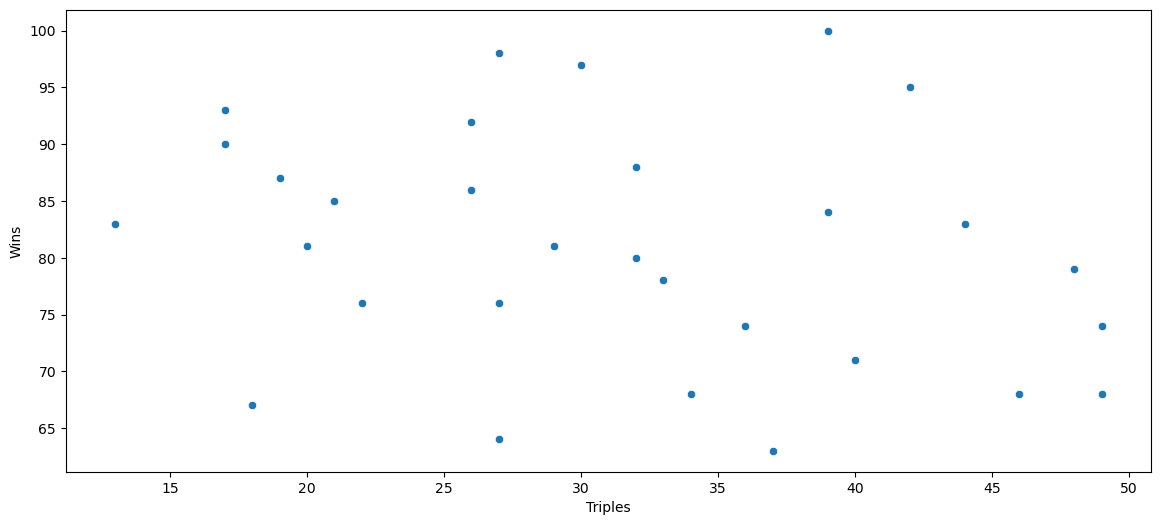

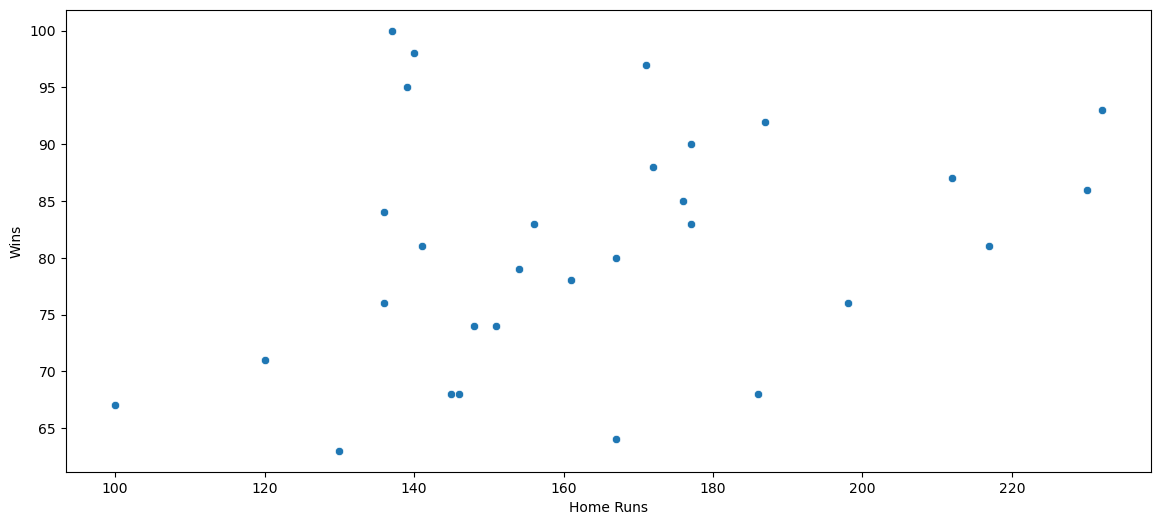

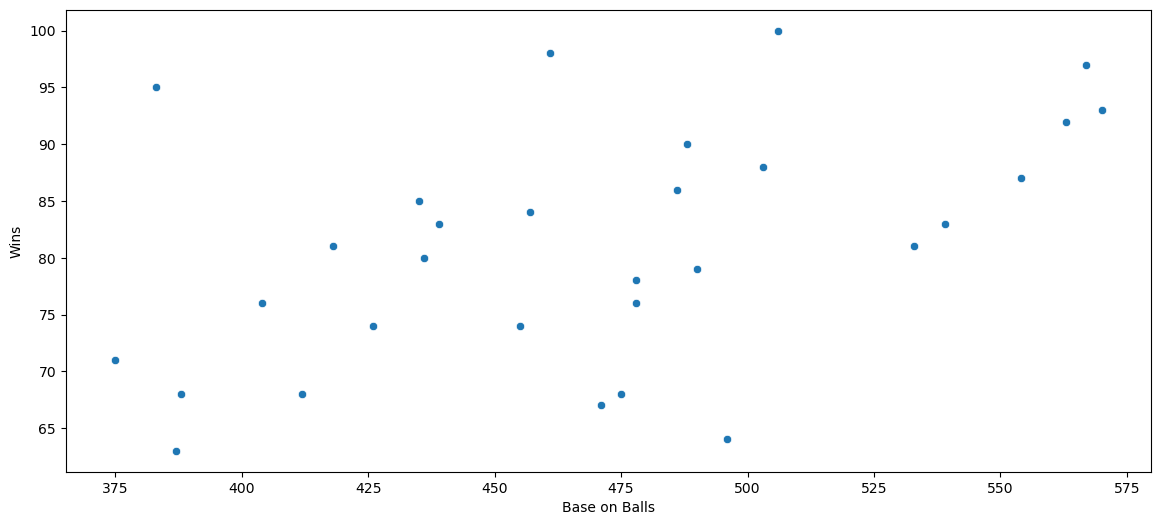

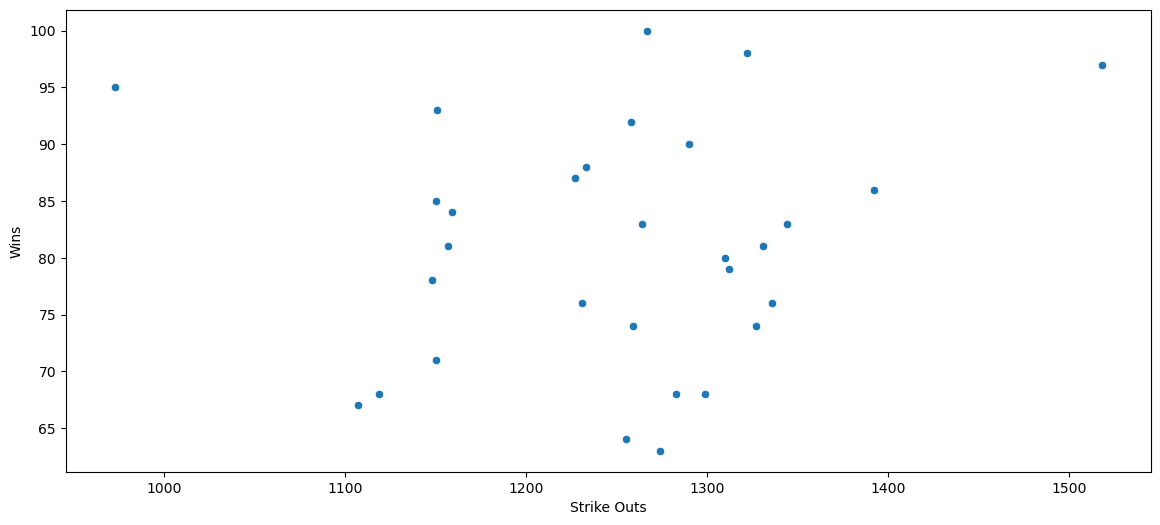

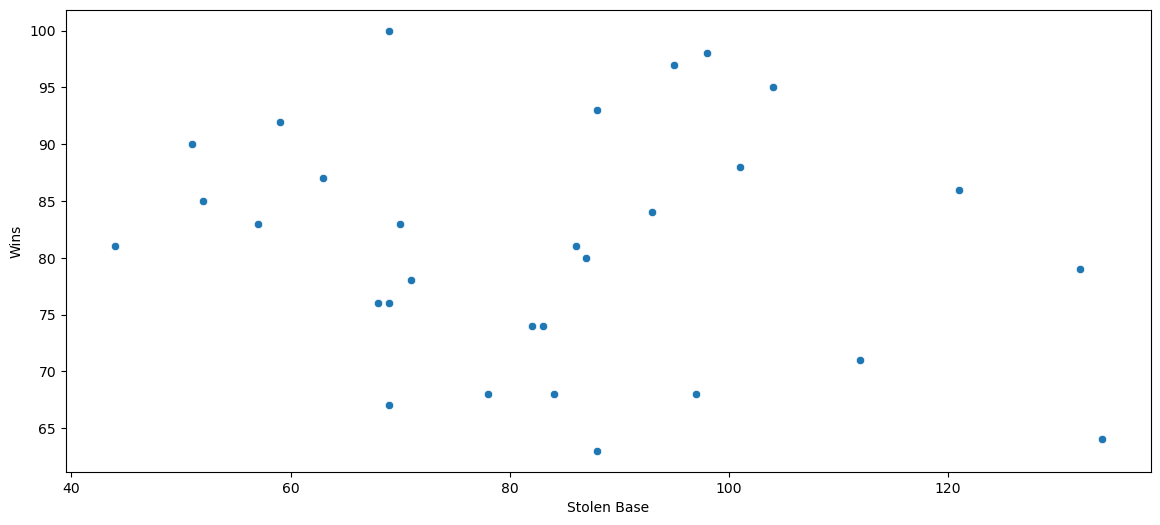

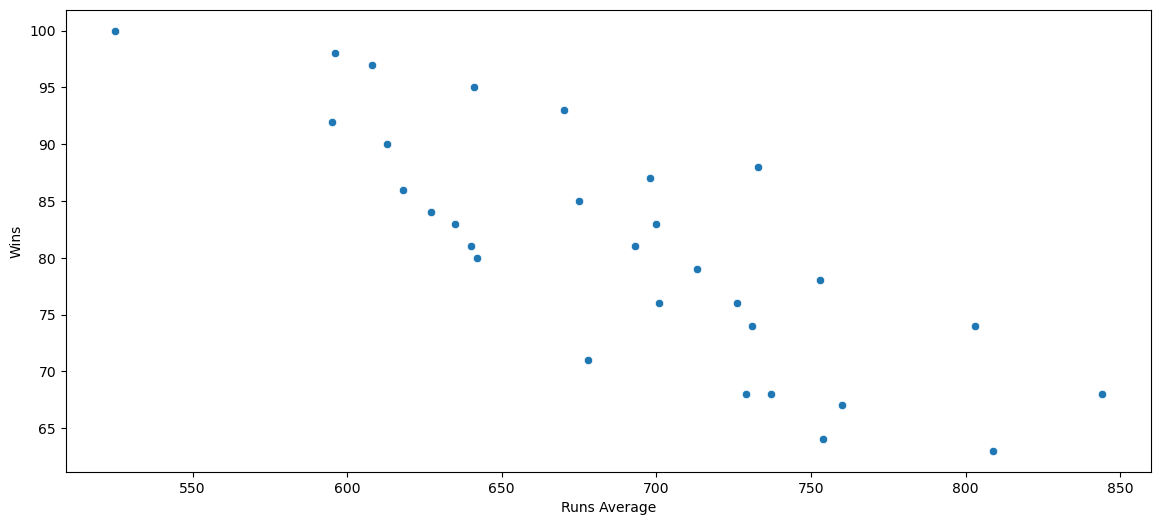

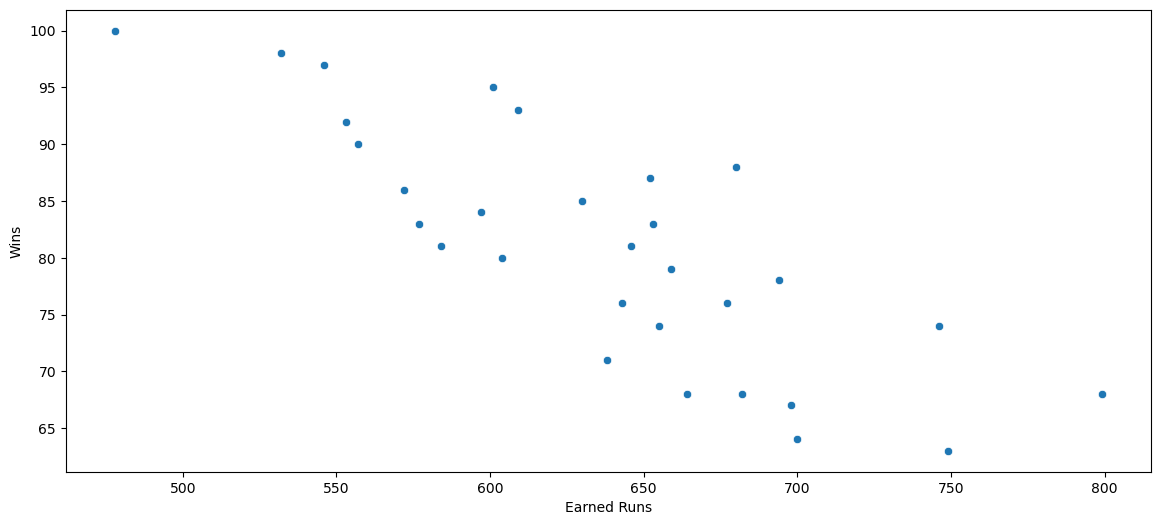

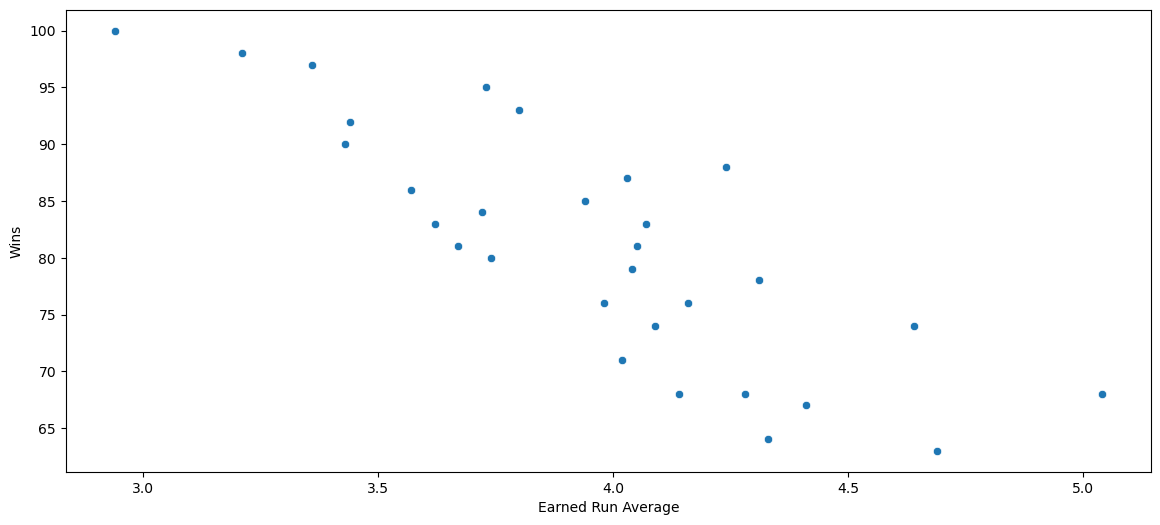

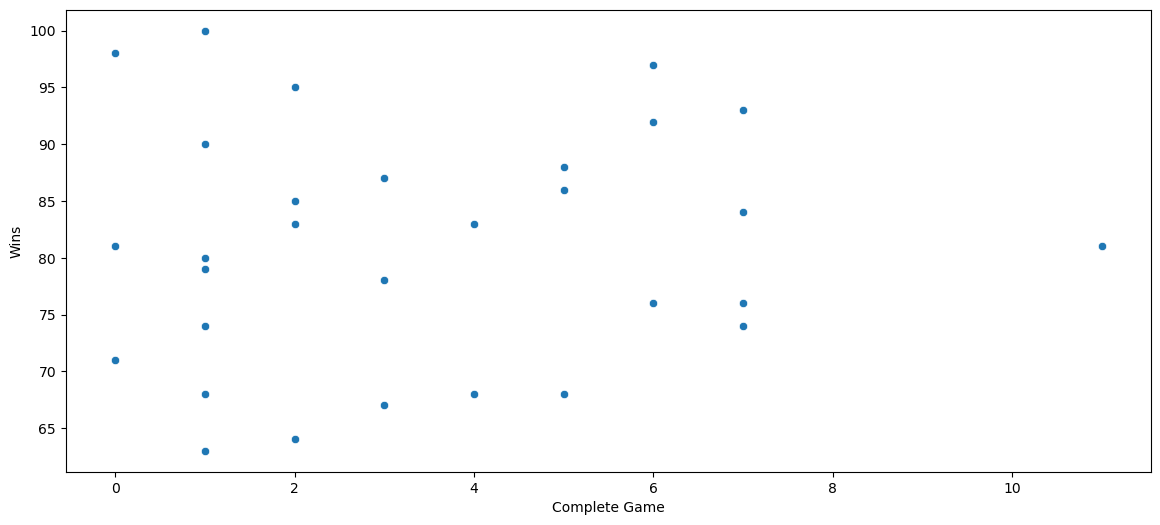

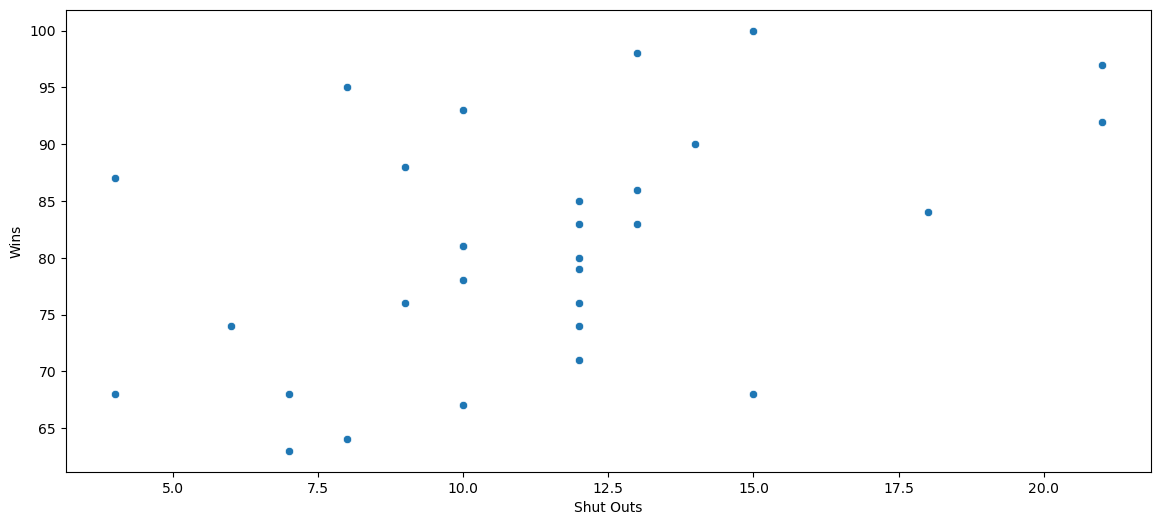

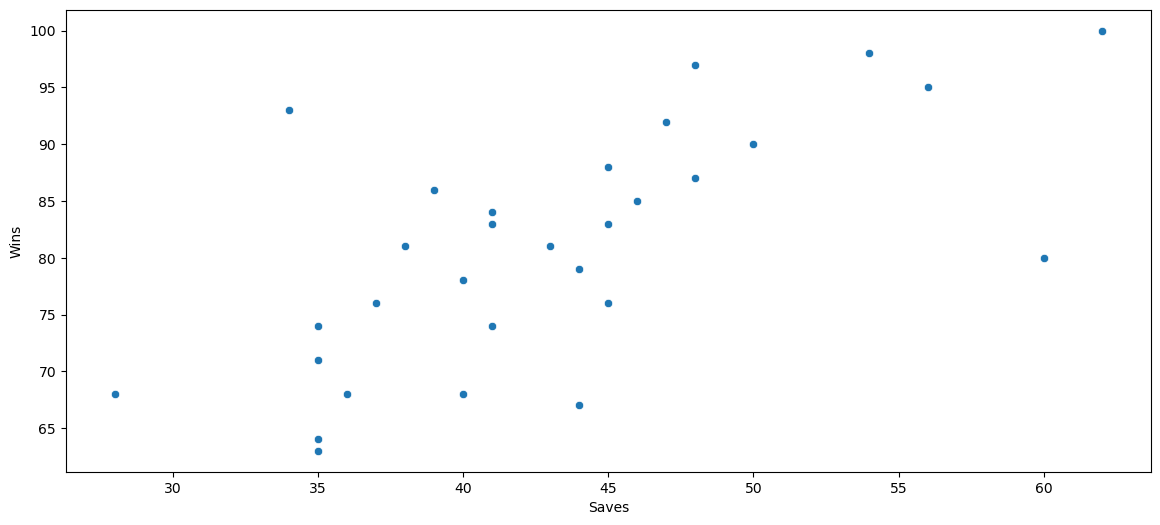

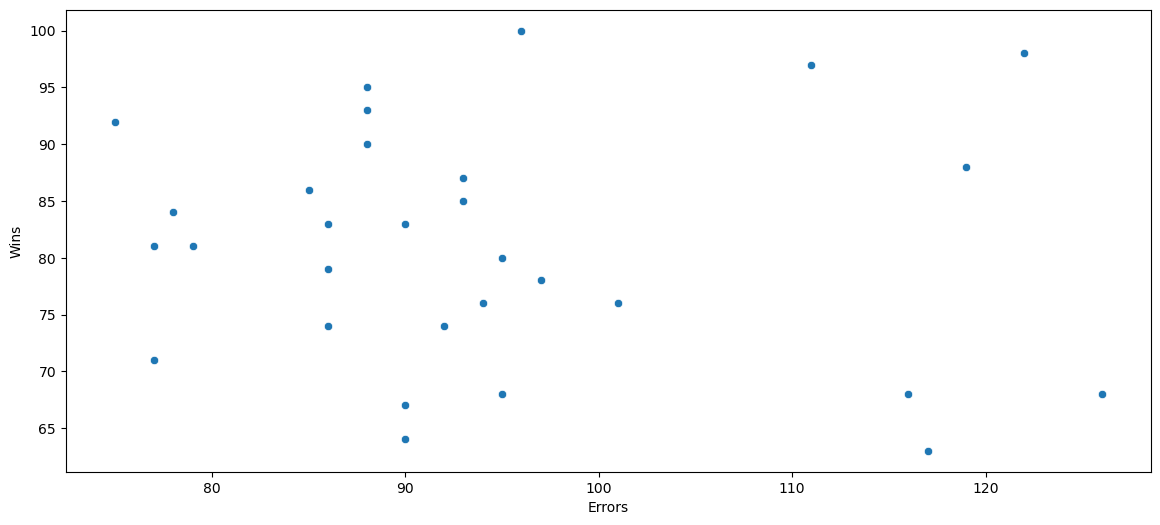

In [13]:
for i in baseball.columns:
    if i !='W':
        plt.figure(figsize=(14,6))
        sns.scatterplot(data=baseball, x=i, y = baseball['Wins'])
        plt.show()

In [14]:
# Earned run Average -------------------- Negtive Linear Relationship
# Earned run         -------------------- Negtive Linear Relationship
# Run Average        -------------------- Negtive Linear Relationship
# Saves             --------------------- Sort of Linear Relationship 
# Runs_Scored      ---------------------- sort of Linear Relationship

# other graph not giving proper information regarding the relationship with Target variable

# Distribution analysis

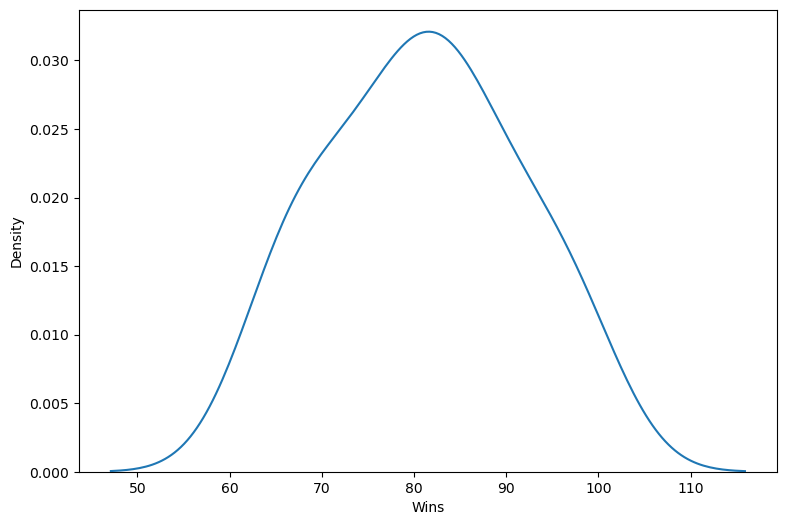

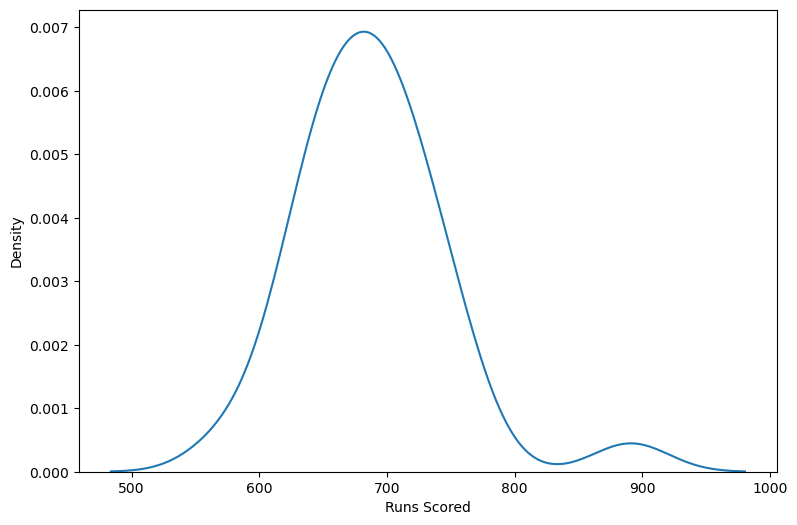

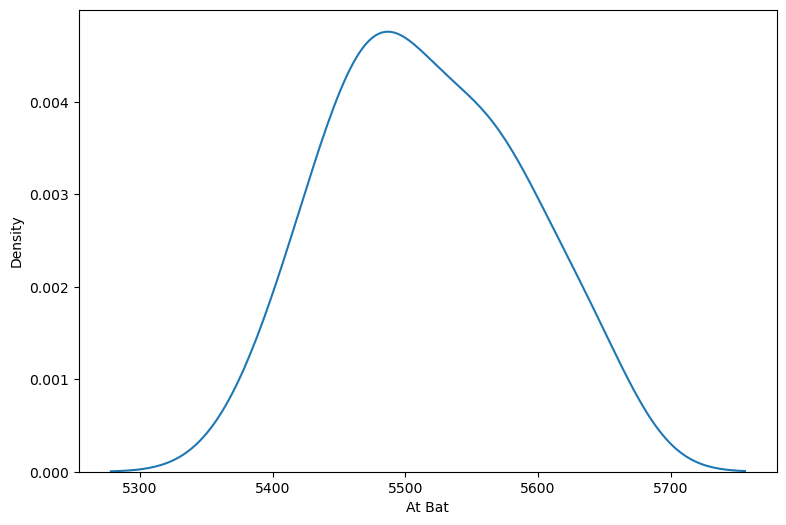

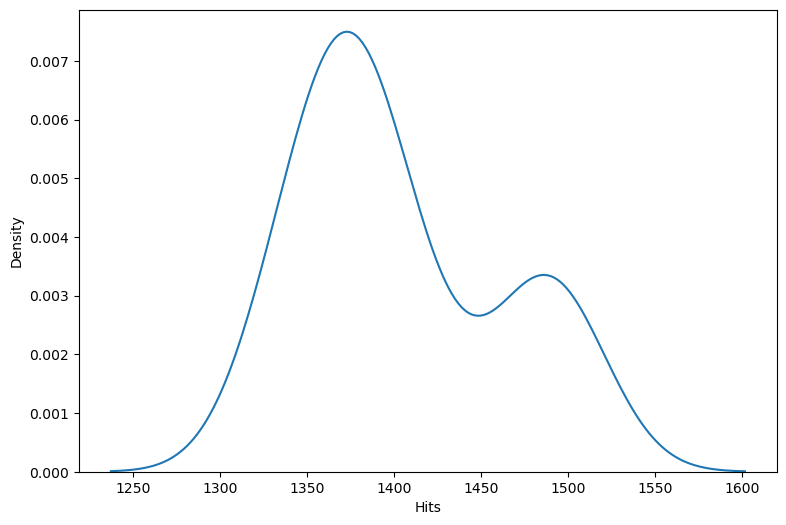

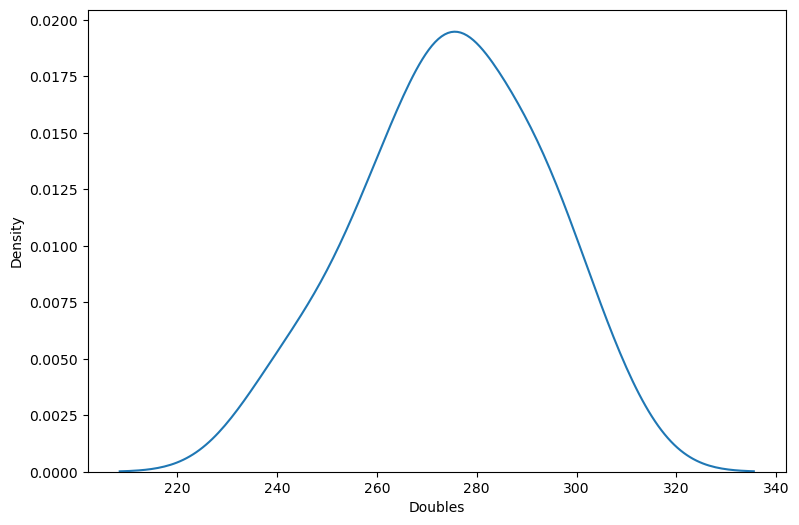

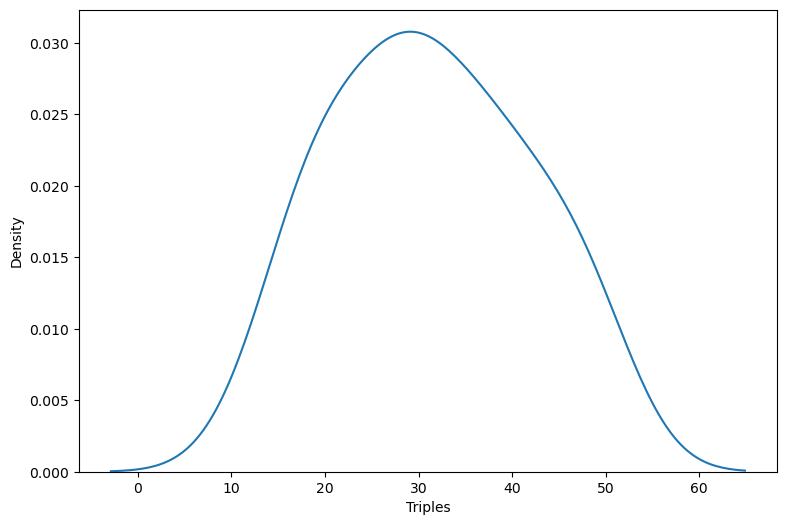

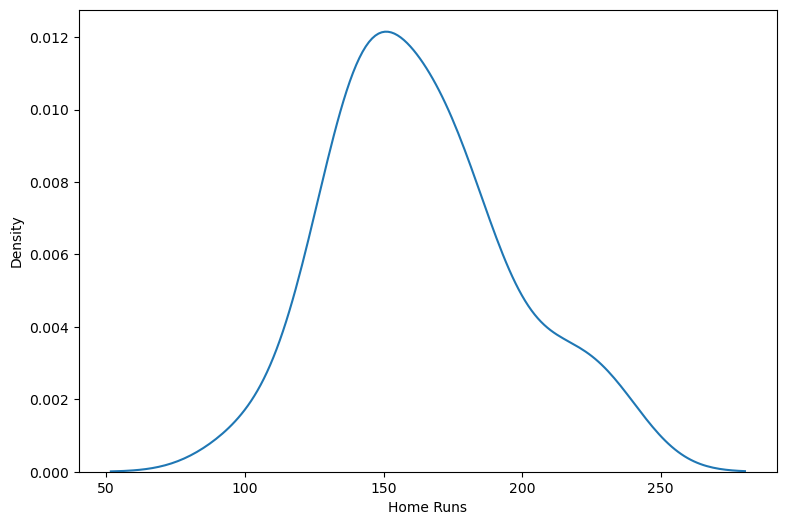

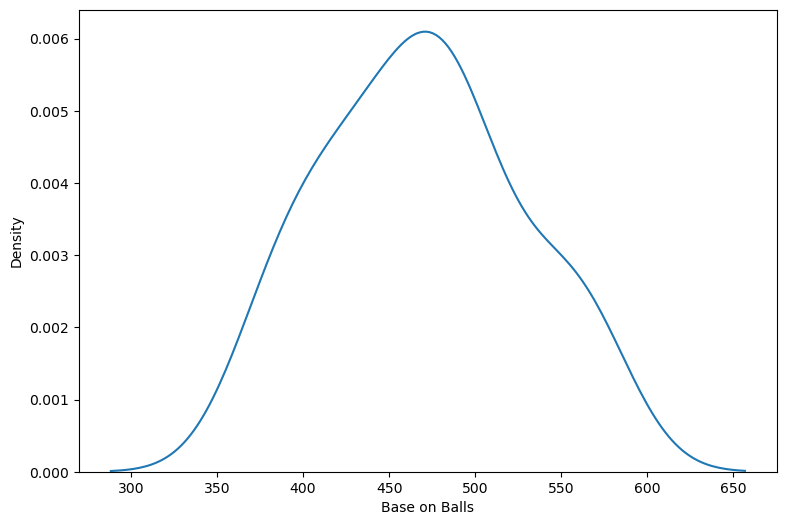

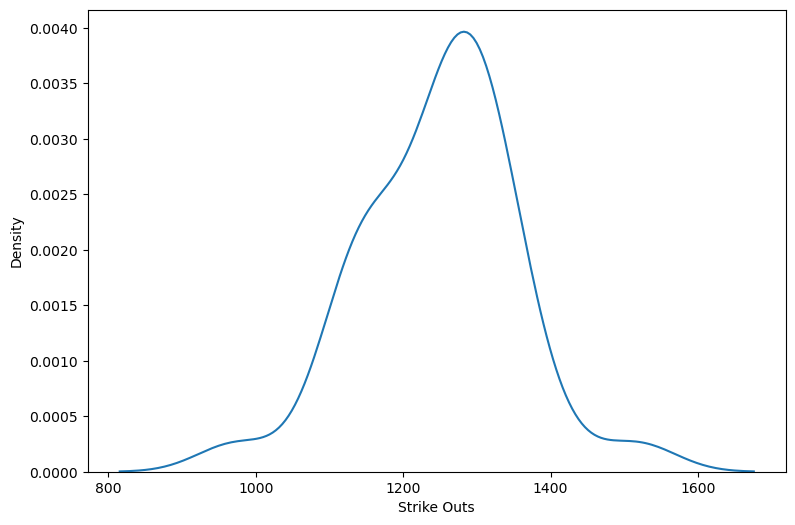

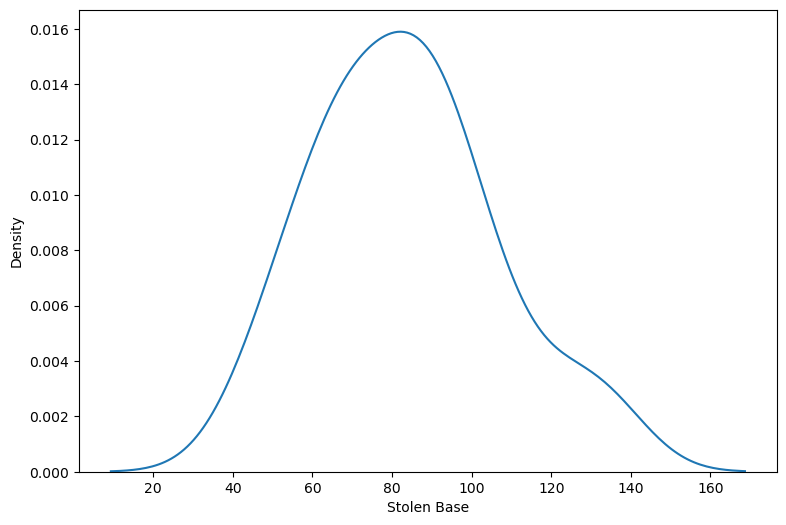

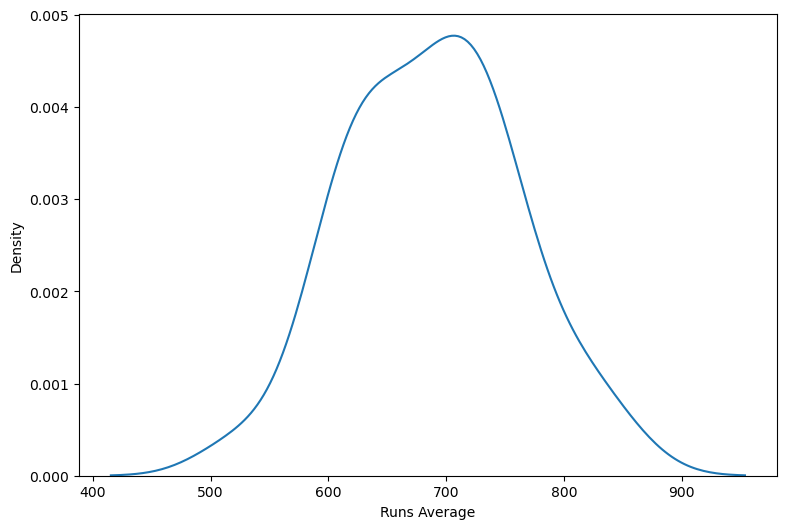

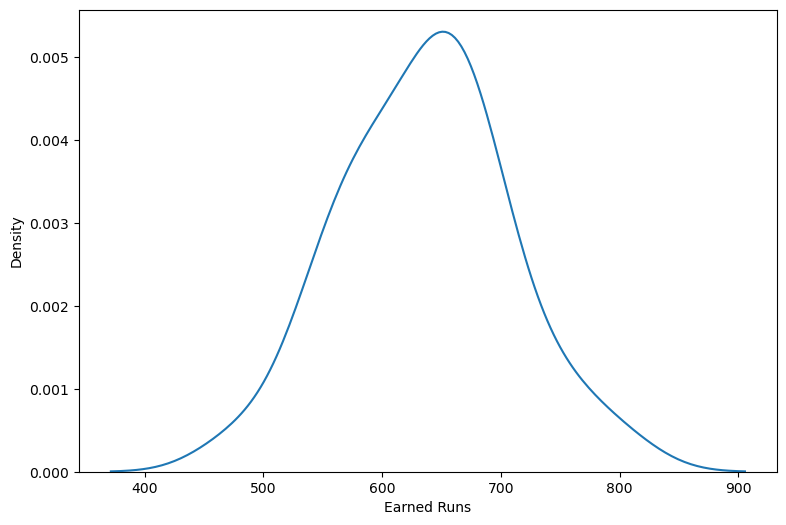

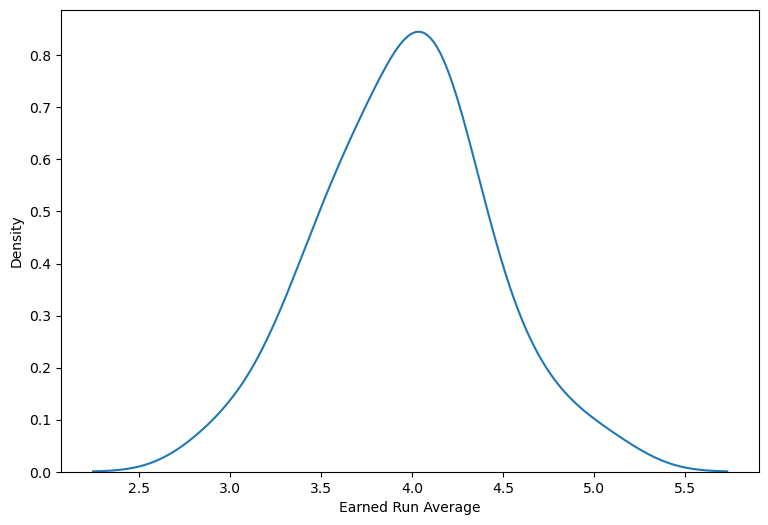

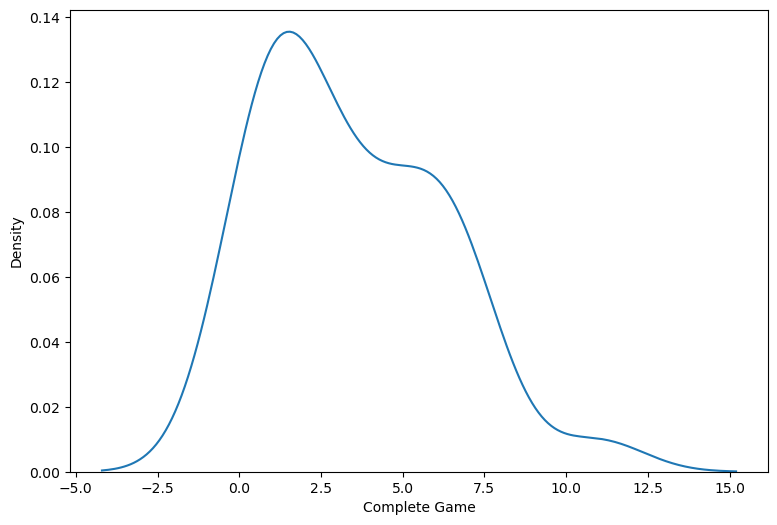

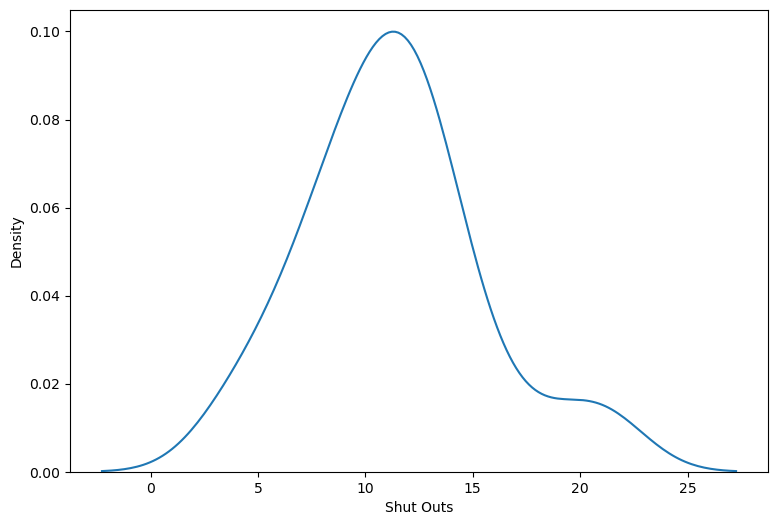

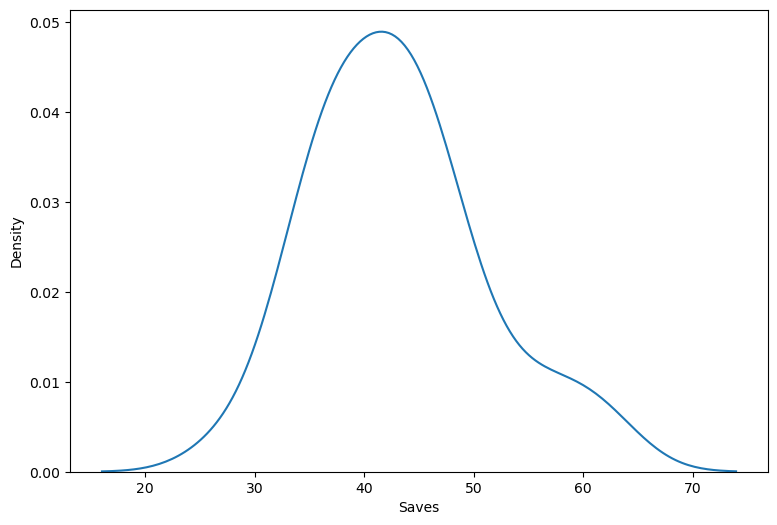

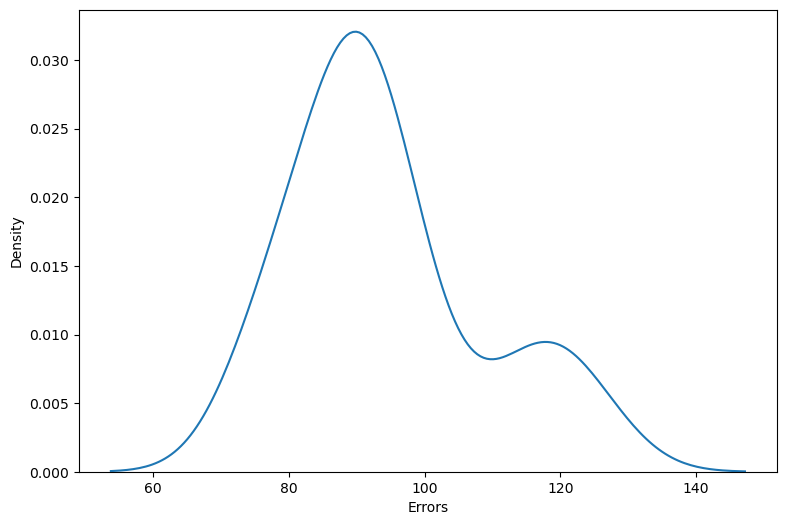

In [16]:
for i in baseball.columns:
    if i !='W':
        plt.figure(figsize=(9,6))
        sns.kdeplot(data=baseball, x=i)
        plt.show()

# # Distribution of data

# Errors is little Right Skewed
# Saves is little right Skewed
# Shut Outs  is little right Skewed
# comelete Game is little right skewed


# Correlation metrics

In [38]:
base = baseball.drop(['Wins'], axis=1)

<Axes: >

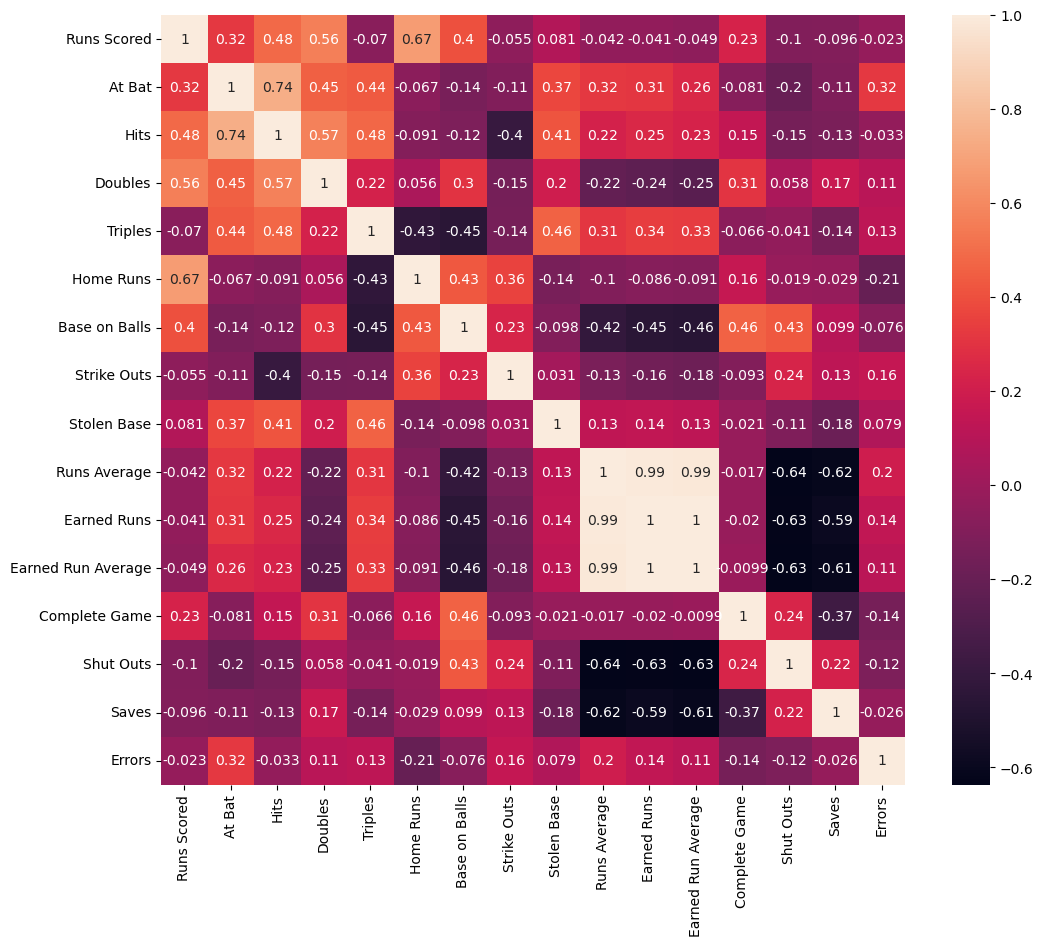

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(base.corr(), annot=True)

# 1) multicollinearity check 

In [40]:
metrics = base.corr()

In [506]:
corr_features = set()
for i in range(len(metrics.columns)):
    for j in range(i):
        
        if abs(metrics.iloc[i, j] > .70):
            colname = metrics.columns[i]
            corr_features.add(colname)
        

In [507]:
corr_features

{'Earned Run Average', 'Earned Runs', 'Hits'}

# 2 Outliers

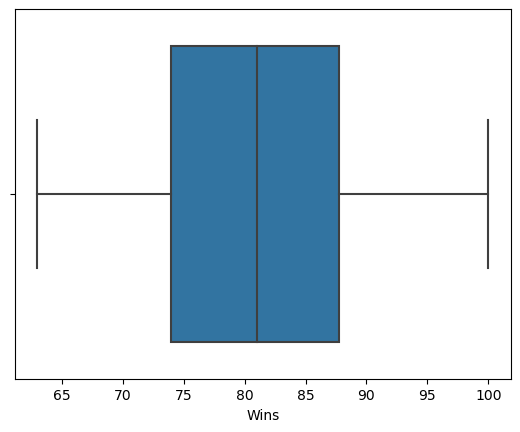

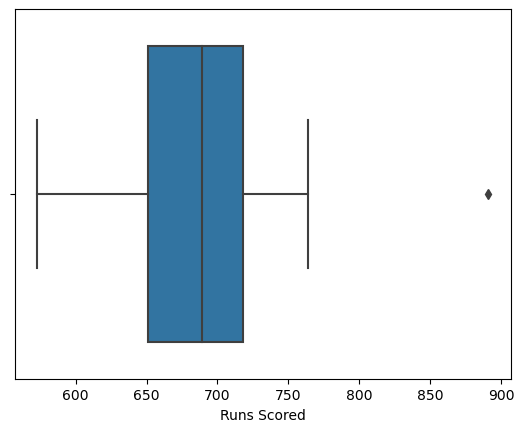

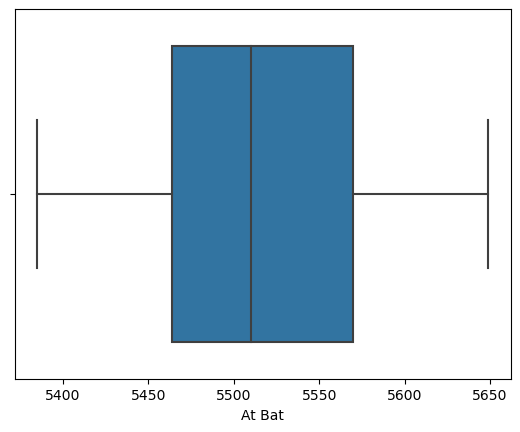

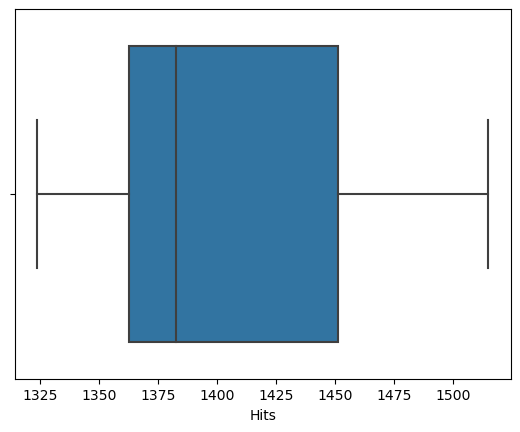

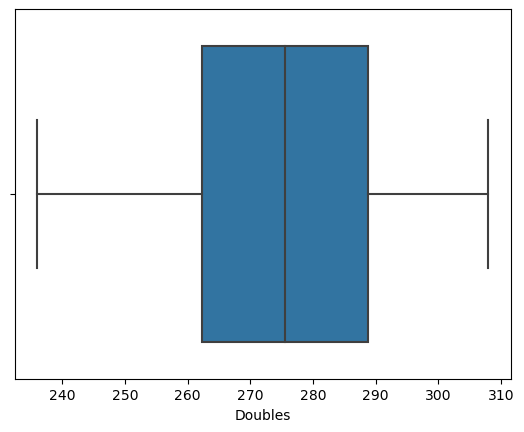

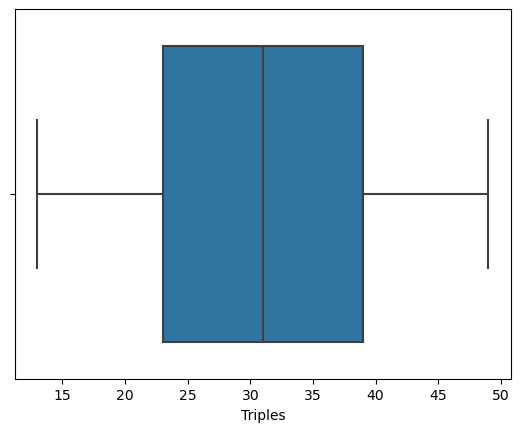

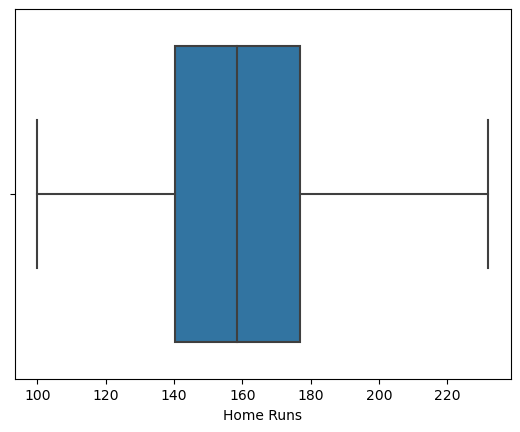

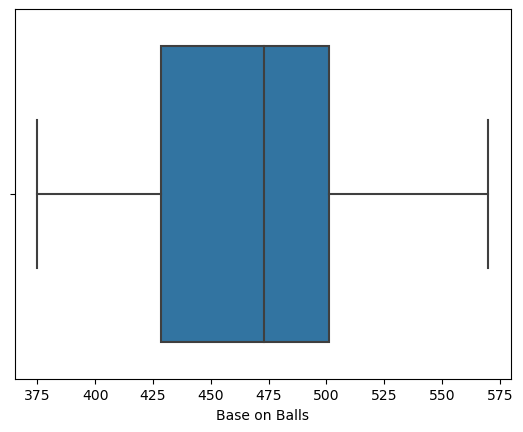

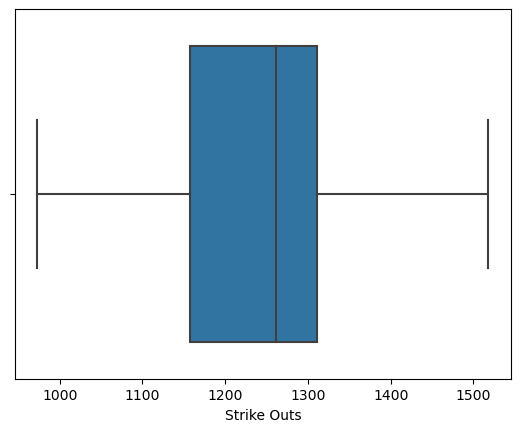

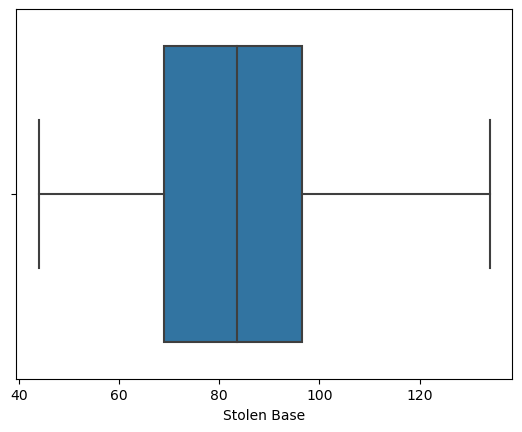

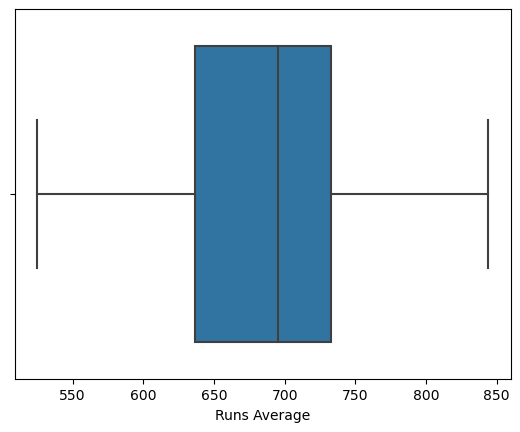

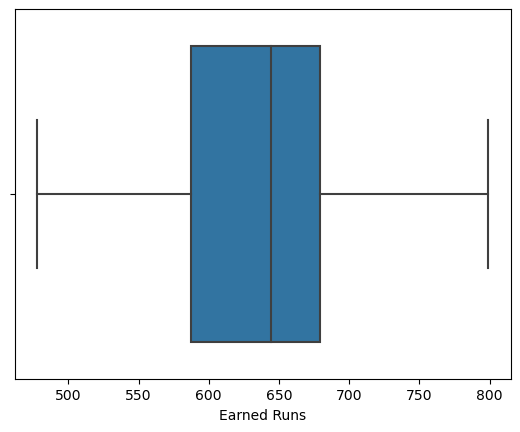

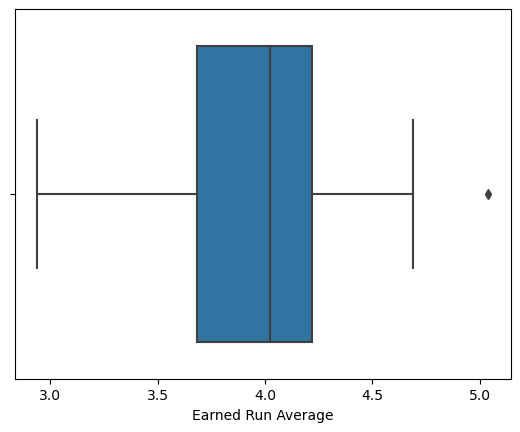

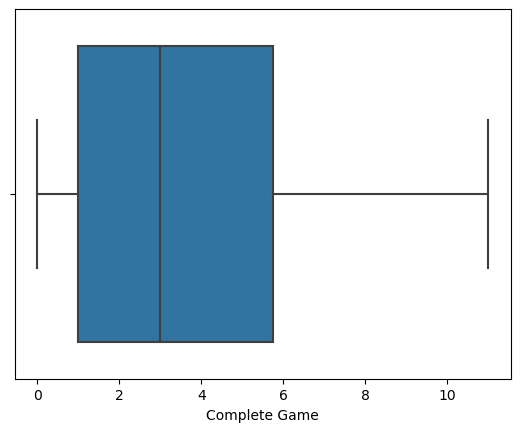

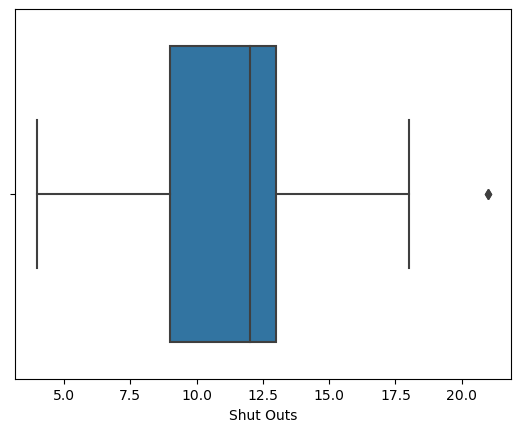

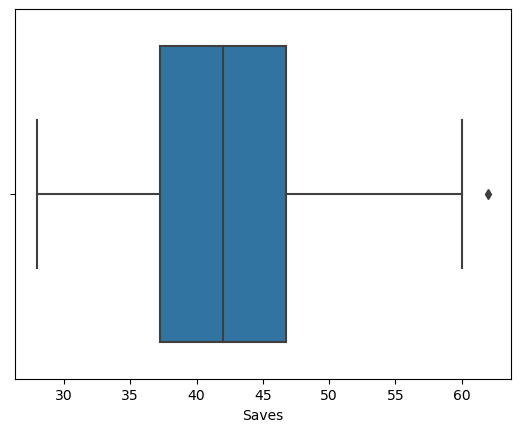

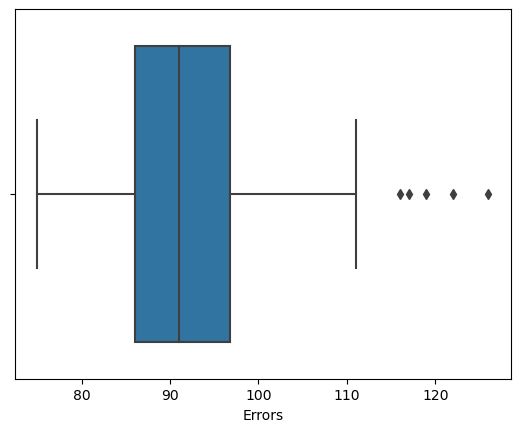

In [508]:
for i in baseball.columns:
    sns.boxplot(data=baseball, x=i)
    plt.show()

In [509]:
from scipy.stats import zscore
z = np.abs(zscore(baseball))


In [510]:
threshold=3
baseball1=baseball[(z<3).all(axis=1)]


In [512]:
baseball1.describe()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1400.896552,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.961724,3.344828,11.344828,43.379310,94.551724
std,10.384006,45.357040,71.701076,56.264265,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,0.461148,2.729153,4.185655,7.816712,14.153713
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,650.000000,5463.000000,1363.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,3.670000,1.000000,9.000000,38.000000,86.000000
50%,81.000000,689.000000,5511.000000,1382.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,4.030000,3.000000,12.000000,43.000000,92.000000
75%,87.000000,713.000000,5571.000000,1420.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,4.240000,5.000000,13.000000,47.000000,97.000000
max,100.000000,764.000000,5649.000000,1515.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [513]:
baseball1

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


# 3) skewness

In [523]:
skew = baseball1.skew()
skew

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

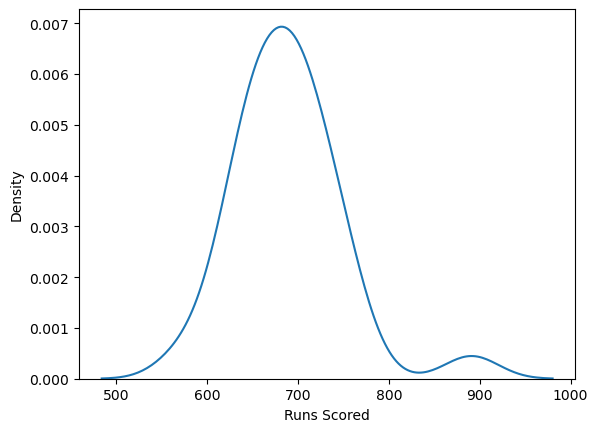

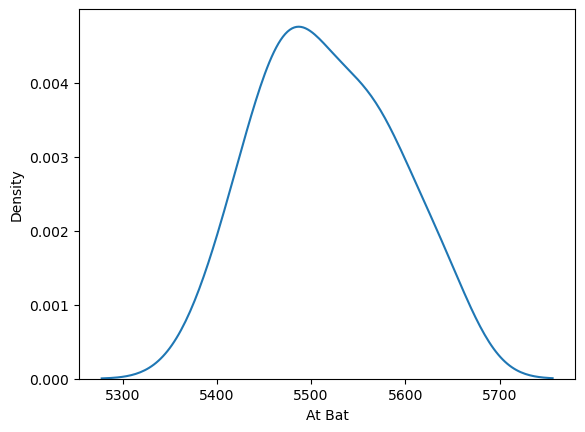

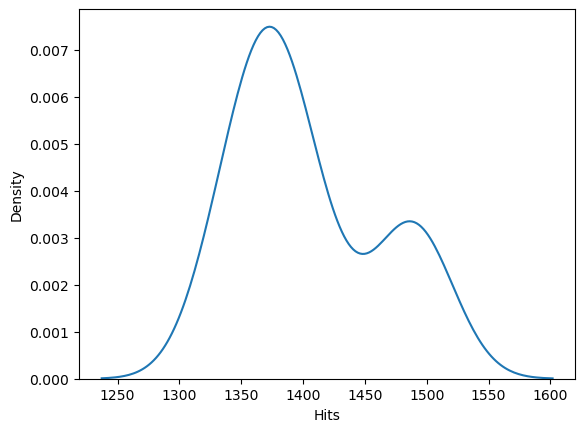

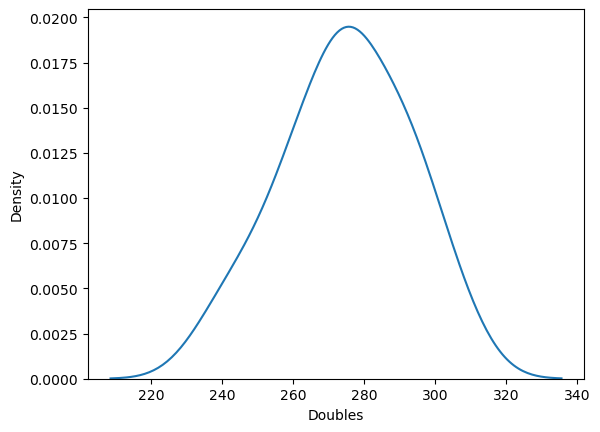

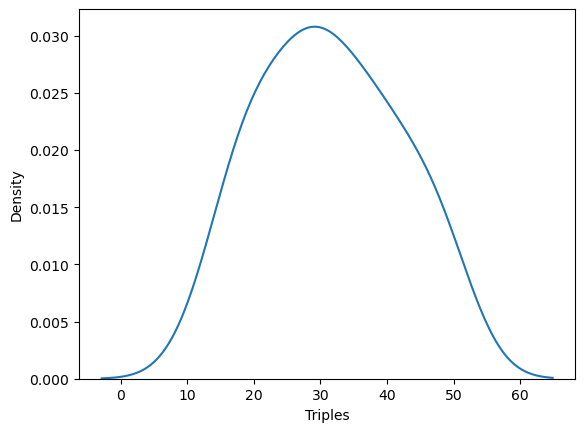

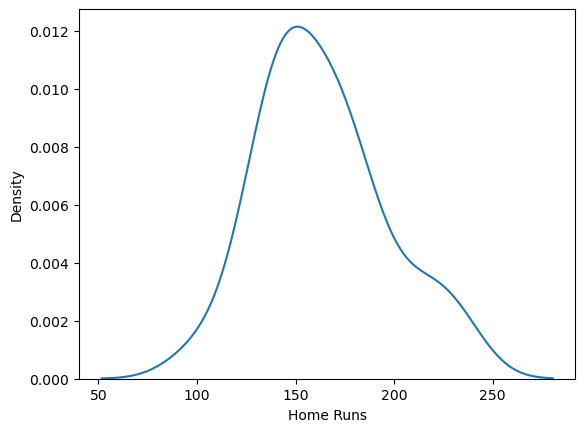

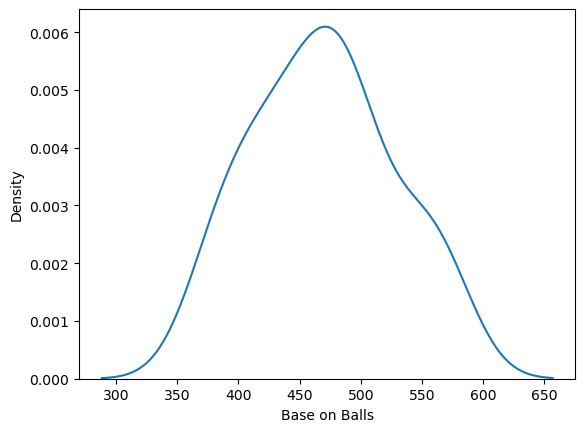

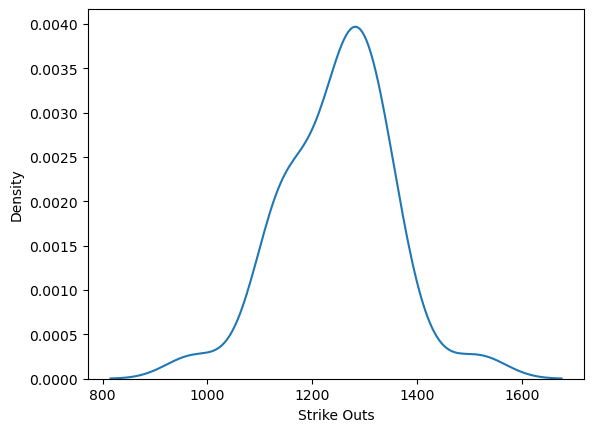

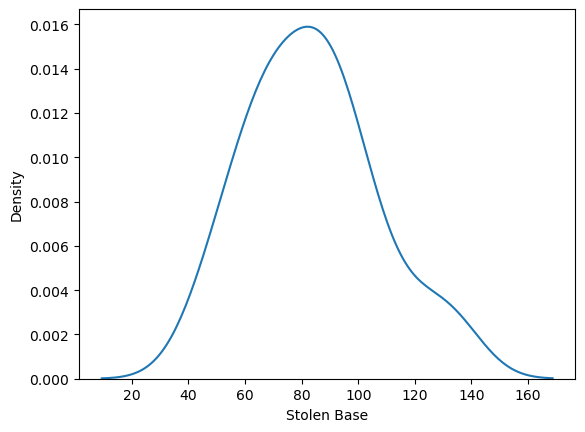

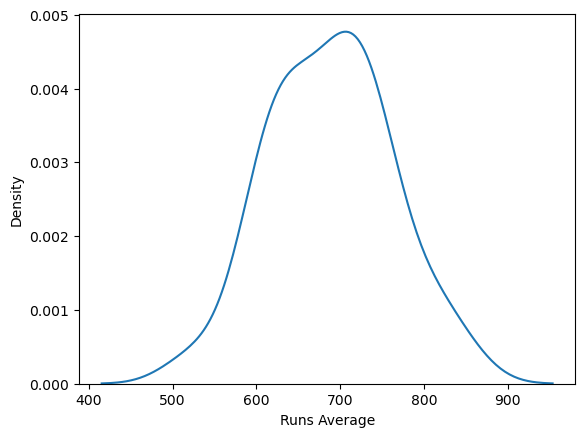

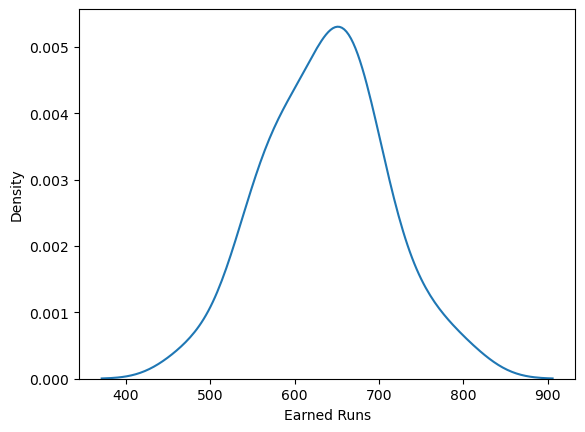

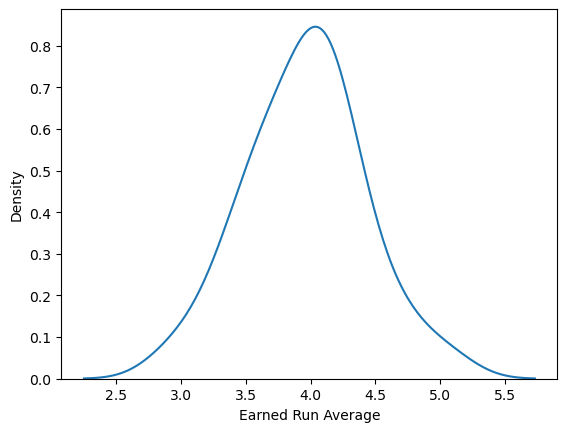

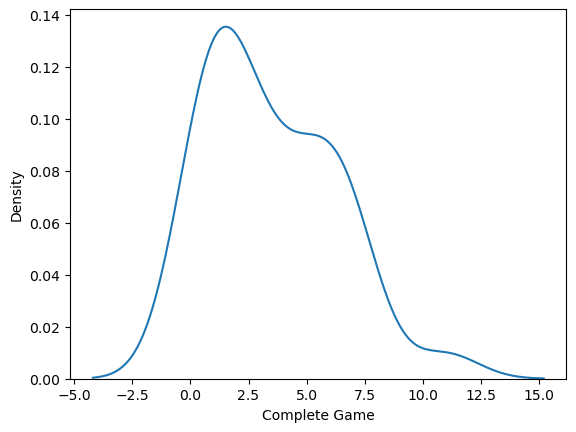

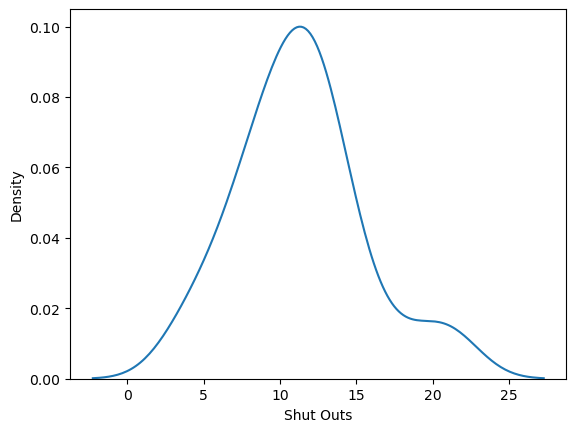

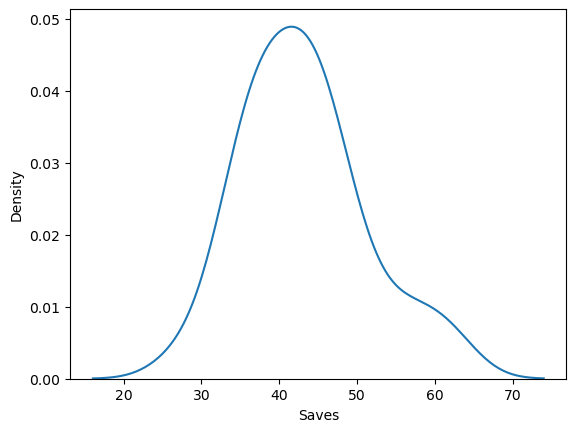

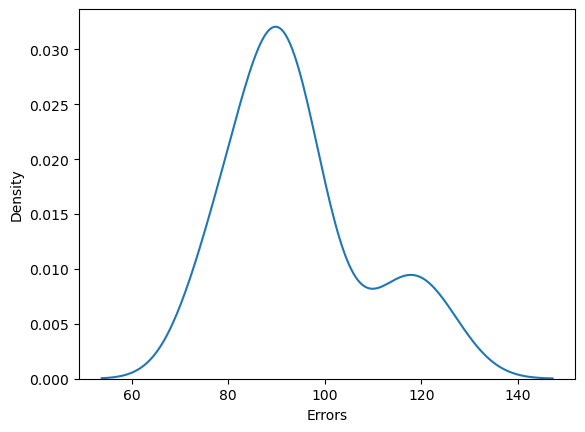

In [519]:

for i in baseball1.columns:
    if i !="Wins":
        sns.kdeplot(data = baseball, x=i)
        plt.show()

In [520]:
# complete_Game contains zero value

In [521]:
for i in skew:
    if i < -0.5 or i > 0.5:
        print(i)
    
  

0.7837722117274881
0.8549795901105167
0.5269430585305683
0.6274804879503074
0.8402711976867623


In [524]:
x = baseball1.drop(['Wins'], axis=1)
y =baseball1['Wins']

# Transformer Using PowerTransformer

In [525]:
from sklearn.preprocessing import PowerTransformer


In [526]:
pt = PowerTransformer()

In [527]:
transformed = pd.DataFrame(pt.fit_transform(x))
transformed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.962544,0.838258,4.163336e-16,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.660979,-0.508052,-0.509292,-0.307098,-0.787002,1.532753,-0.348265
1,0.298863,-0.692877,-2.498002e-16,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.160226,0.235800,0.241440,-0.307098,0.236737,0.312020,-0.540820
2,-0.312105,-1.110460,0.000000e+00,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.674967,-0.752214,-0.642098,2.011315,-0.252844,-0.664137,-1.326125
3,-1.308298,0.259829,-8.326673e-17,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.174077,0.093091,0.043013,1.264463,-0.513555,-0.820689,0.650818
4,0.137737,1.243468,4.718448e-16,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.575971,1.555853,1.493491,1.264463,0.236737,-1.149165,-0.540820
5,1.964209,0.729996,0.000000e+00,-0.163010,-1.295827,1.631637,1.579494,-0.269583,-0.884526,0.132517,0.221537,0.153276,0.121871,-2.064039,0.677176,0.082858
6,0.698146,-0.426862,-1.387779e-16,-1.542635,-1.182758,1.767734,-0.877217,0.770980,-2.082843,0.063208,0.135920,0.197363,-1.732896,-0.252844,0.052325,-1.588197
7,-0.852595,-0.426862,-8.326673e-17,0.199897,0.068703,0.269125,-0.520476,0.556008,0.267558,-0.646992,-0.465016,-0.487168,-0.870682,0.236737,1.908137,0.237592
8,1.555951,1.704355,4.163336e-16,1.255256,0.166017,0.065014,0.270944,-1.019210,-0.466233,0.891396,0.819308,0.769577,0.121871,-0.252844,-0.365006,0.383386
9,1.631727,-0.052584,1.110223e-16,0.262086,0.068703,0.434620,0.717576,-0.211199,0.824915,0.616173,0.620346,0.615685,0.770649,-0.513555,0.312020,1.554265


In [73]:
# there is no skewness in any feature exists 

In [528]:
transformed.skew()

0    -0.024842
1     0.081092
2     0.000000
3    -0.052793
4    -0.075139
5     0.000448
6    -0.008572
7     0.051530
8    -0.009570
9    -0.011974
10   -0.004988
11   -0.000401
12   -0.045947
13    0.000529
14   -0.000925
15    0.065585
dtype: float64

In [543]:
transformed.shape

(29, 16)

# Robust Scaler

In [560]:
ss = RobustScaler()
x_scaled = pd.DataFrame(ss.fit_transform(transformed))

# PCA

In [561]:
pca = PCA(n_components=14)

In [562]:
selected = pd.DataFrame(pca.fit_transform(x_scaled))

In [563]:
selected.skew()

0     0.013043
1     0.111442
2    -0.041283
3     0.061832
4     0.172961
5     0.046921
6     0.440013
7     0.235738
8     0.423297
9     0.161262
10    0.539014
11    0.617579
12    0.048138
13    0.397405
dtype: float64

# Train test Split

In [564]:
x_train,x_test,y_train,y_test = train_test_split(selected, y, test_size=0.25, random_state=42)

# Model Building 

In [566]:
models = [LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(), SVR(), XGBRegressor(), GradientBoostingRegressor(),
         AdaBoostRegressor(), Lasso(), Ridge()]

for model in models:
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print('  ')
    print('___________________________')
    print(model.__class__.__name__)
    print('   ')
    print('Training_R2 Score:', r2_score(y_train, y_train_pred))
    print('Testing_R2 Score:', r2_score(y_test, y_test_pred))
    print('----------------------------------------------------')
    print('Traning_mean_squared_error:', mean_squared_error(y_train, y_train_pred))
    print('Test_mean_squared_error:', mean_squared_error(y_test, y_test_pred))
    print('----------------------------------------------------')
    print('Traning_mean_absolute_error:', mean_absolute_error(y_train, y_train_pred))
    print('Test_mean_absolute_error:', mean_absolute_error(y_test, y_test_pred))
    print('-----------------------------------------------------')
    print('explained_variance_score:', explained_variance_score(y_train, y_train_pred))
    print('explained_variance_score:', explained_variance_score(y_test, y_test_pred))
    print('____________________________________________________________________')

  
___________________________
LinearRegression
   
Training_R2 Score: 0.957959620932479
Testing_R2 Score: 0.8358621876105589
----------------------------------------------------
Traning_mean_squared_error: 4.282589544737672
Test_mean_squared_error: 18.044900749564185
----------------------------------------------------
Traning_mean_absolute_error: 1.7477738098442206
Test_mean_absolute_error: 4.014933808677805
-----------------------------------------------------
explained_variance_score: 0.957959620932479
explained_variance_score: 0.8432430247438782
____________________________________________________________________
  
___________________________
RandomForestRegressor
   
Training_R2 Score: 0.9564395846318227
Testing_R2 Score: 0.31510108015918104
----------------------------------------------------
Traning_mean_squared_error: 4.437433333333336
Test_mean_squared_error: 75.29607500000003
----------------------------------------------------
Traning_mean_absolute_error: 1.754761904761905

# cross Validation

In [567]:
models = {
    'lr': LinearRegression(),
    'rf': RandomForestRegressor(),
    'kr': KNeighborsRegressor(),
    'svr': SVR(),
    'xg': XGBRegressor(),
    'gd': GradientBoostingRegressor(),
    'adb': AdaBoostRegressor(),
    'lasso' : Lasso(),
    'Ridge' : Ridge()
}



In [568]:
for model_name, model in models.items():
    scores = cross_val_score(model, x_train, y_train)
    print(model_name,':', np.mean(scores))
    

lr : -14.754682400996296
rf : 0.36101582692517736
kr : 0.23963614547744233
svr : -0.46782626824944273
xg : 0.23541306531689118
gd : -0.16030105722524007
adb : 0.25371378526269817
lasso : 0.5826481113642614
Ridge : 0.5232042941247801


# Final Model 

In [572]:
from sklearn.linear_model import Ridge


In [593]:
rd1 = Ridge()

In [594]:
rd1.fit(x_train, y_train)

Ridge()

# scores

In [597]:
y_pred_train1 = rd1.predict(x_train)

In [598]:
y_pred_test1 = rd1.predict(x_test)

In [599]:
r2_score(y_train, y_pred_train1)*100

93.07565535942778

In [600]:
r2_score(y_test, y_pred_test1)*100

83.9426621533214

# GridSearchCV

In [579]:
param = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'fit_intercept' : [True,False], 'max_iter' : [100,200,300,350,400,450,500,600,700,800,900,1000], 'random_state': np.arange(100)}

In [580]:
gsc = RandomizedSearchCV(estimator = Ridge(), param_distributions = param, cv=5, n_jobs = -1, verbose = 2)

In [581]:
gsc.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9, 1.0],
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 200, 300, 350, 400,
                                                     450, 500, 600, 700, 800,
                                                     900, 1000],
                                        'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   verbose=2)

In [582]:
gsc.best_params_

{'random_state': 70, 'max_iter': 600, 'fit_intercept': True, 'alpha': 0.9}

# Ridge

In [583]:
rd = Ridge(alpha = 0.9, fit_intercept = True, max_iter = 600, random_state = 70)

In [584]:
rd.fit(x_train, y_train)

Ridge(alpha=0.9, max_iter=600, random_state=70)

# Scores of Traning abd Test

In [585]:
y_pred_train = rd.predict(x_train)

In [586]:
r2_score(y_train, y_pred_train)*100

93.1610794603898

In [587]:
y_pred_test = rd.predict(x_test)

In [588]:
r2_score(y_test, y_pred_test)*100

84.33057829435091

# Cross Validatiion score 

In [590]:
scores = cross_val_score(rd, x_train, y_train)

In [591]:
scores.mean()*100

50.815755353438085

<Axes: xlabel='Wins', ylabel='Density'>

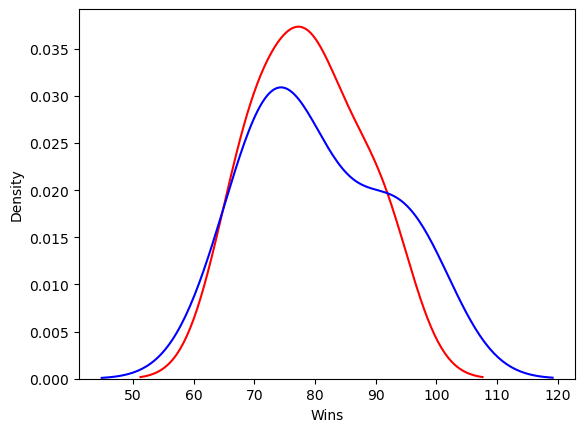

In [592]:
sns.kdeplot(y_pred_test, color ='red')
sns.kdeplot(y_test, color = 'blue')